Hecho por: Miguel Ángel Fernández Alonso

Correo: mfernandez1@correo.ugr.es

DNI: 76065289B

**Definición de librerías:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ejercicio 1**

Implemente una función que resuelva el problema cinemático directo para
un manipulador RR, esto es, que calcule las coordenadas de la posición del
extremo del robot dadas las variables de articulación.

In [2]:
def pcd(q1, q2, l1, l2):
  x = l1 * np.cos(q1) + l2 * np.cos(q1+q2)
  y = l2 * np.sin(q1) + l2 * np.sin(q1+q2)
  return (x, y)

x, y = pcd(np.pi/3, np.pi/5, 2, 2)
print(x)
print(y)


0.7909430734646936
3.7210945983054238


Para la realización de este ejercicio se realiza la función *pcd*, que, dados los ángulos *q1* y *q2* y las longitudes *l1* y *l2* calcula las coordenadas (x,y) en la que se encuentra el efector del robot y devuelve los valores.

Ejemplo:La salida de la ejecución del código *x, y = pcd(np.pi/3, np.pi/5, 2, 2)* es

*0.7909430734646936*

*3.7210945983054238*

**Ejercicio 3**

Al analizar la trayectoria, resulta de ayuda visualizar los eslabones del robot.
Para conseguirlo, implemente una tercera función que los dibuje junto a la
trayectoria.

In [3]:
def dibujar_robot(q1, q2, l1, l2):
  x0, y0 = 0, 0 # Posición de la articulación 1
  x1, y1 = pcd(q1, 0, l1, 0) # Posición de la articulación 2
  x2, y2 = pcd(q1, q2, l1, l2) # Posición del extremo del robot
  x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria
  plt.plot(x, y, 'k') # Traza la trayectoria
  plt.plot(x0, y0, 'k.') # Dibuja la articulación 1
  plt.plot(x1, y1, 'k.') # Dibuja la articulación 2


En este ejercicio se implementa el método *dibujar_robot*, al cual se le pasa por parámetros los ángulos *q1* y *q2* y las longitudes *l1* y *l2*. Con estos datos se obtiene la coordenada (x, y) en la que se encuentra la base del robot, así como la primera articulación y la segunda y se pinta en una gráfica.

**Ejercicio 2**

Implemente una nueva función que, haciendo uso de la función pcd, dibuje la
trayectoria seguida por el extremo del robot dadas unas variables de articulación concretas.

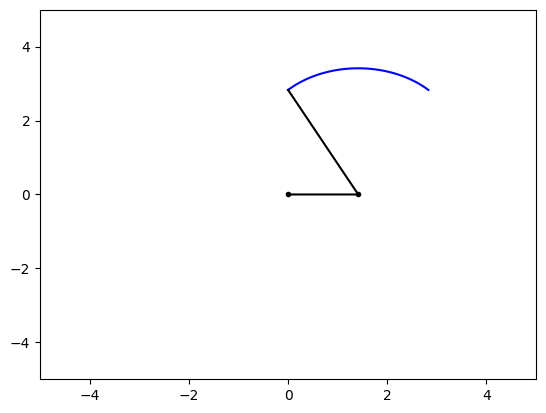

In [10]:
def dibujar_trayectoria_pcd(q1s, q2s, l1, l2):
  n = min(len(q1s), len(q2s))
  xs = np.zeros(n)
  ys = np.zeros(n)
  for i in range(n):
    xs[i], ys[i] = pcd(q1s[i], q2s[i], l1, l2)
  plt.plot(xs, ys, 'b')
  limite = l1 + l2 + 1
  plt.xlim([-limite, limite])
  plt.ylim([-limite, limite])
  dibujar_robot(q1s[-1], q2s[-1], l1, l2)

q1s = np.ones (100) * np.deg2rad (45)
q2s = np.linspace (0, np.deg2rad (90) , 100)
dibujar_trayectoria_pcd (q1s , q2s , 2, 2)

Para este ejercicio se implementa el método *dibujar_trayectoria_pcd*, en el que dados dos vectores de ángulos *q1s* y *q2s* y las longituds *l1* y *l2*, se calculan las coordenadas (x, y) correspondientes a cada elemento de *q1s* y *q2s* haciendo uso del método *pcd*. Una vez calculadas todas las coordenadas las muestra en una gráfica. Podemos observar en la gráfica el movimiento realizado por el efector del robot.

Ejemplo: la salida de la ejecución del siguiente código:

*q1s = np.ones(100) * np.deg2rad(45)*

*q2s = np.linspace(0, np.deg2rad(90), 100)*

*dibujar_trayectoria_pcd(q1s, q2s, 2, 2)*



**Ejercicio 4**

Compruebe el correcto funcionamiento de las funciones creadas en los ejercicios
anteriores trazando una trayectoria con 100 puntos en los que q1 vale siempre
π/4 y q2 toma valores entre 0 y π/2. Suponga que l1 = l2 = 2. Represente el
resultado. Adicionalmente pruebe con otros valores para q1 y q2 que generen trayectorias distintas.


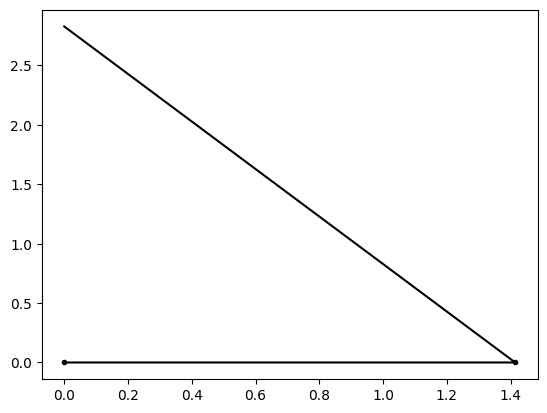

In [11]:
dibujar_robot(q1s[-1], q2s[-1], 2, 2)

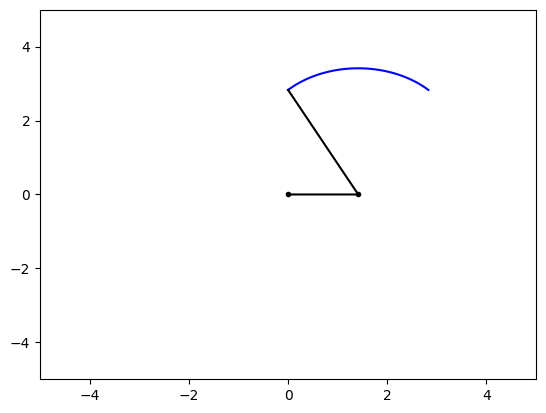

In [12]:

dibujar_trayectoria_pcd(q1s, q2s, 2, 2)

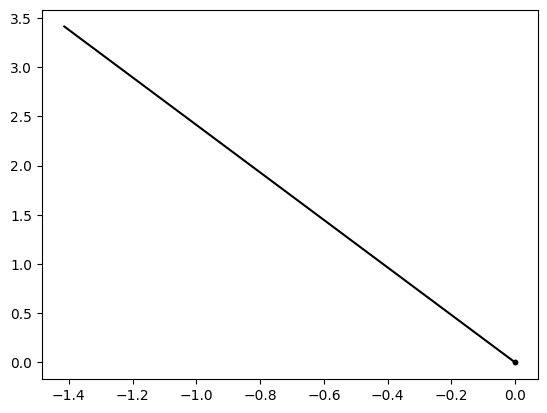

In [16]:
q1s = np.ones (100) * np.deg2rad (90)
q2s = np.linspace (0, np.deg2rad (45) , 100)
dibujar_robot(q1s[-1], q2s[-1], 2, 2)

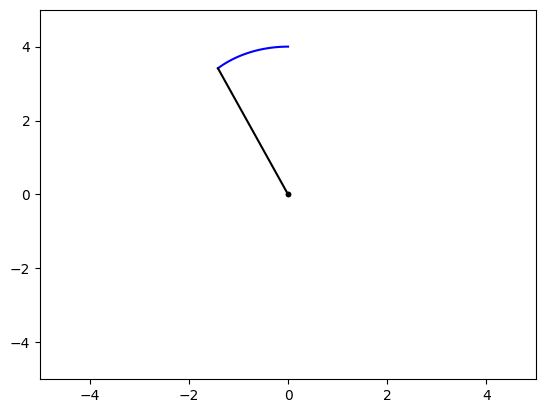

In [14]:
dibujar_trayectoria_pcd(q1s, q2s, 2, 2)

Para la resolución de este ejercicio definimos dos variables *q1s = np.ones(100) * np.deg2rad(45)* y *q2s = np.linspace(0, np.deg2rad(90), 100)*.

Una vez se tienen los vectores de los ángulos se realiza una llamada a la función *dibujar_robot(q1s[-1], q2s[-1], 2, 2)*. Se toman los últimos valores de los vectores *q1s* y *q2s* para que el brazo robótico se dibuje al final de su trayectoria.

He introducido también diferentes valores de *q1* y *q2* para generar trayectorias distintas.

He hecho que *q1* tome siempre como valor π/2 y que *q2* tome valores entre 100 y π/4

**Ejercicio 5**

Implemente una función que permita analizar el movimiento "paso a paso".

In [17]:
def animacion_trayectoria_pcd(q1s, q2s, l1, l2):
  n = min(len(q1s), len(q2s))
  for i in range(1, n):
    plt.cla()
    dibujar_trayectoria_pcd(q1s[0:i], q2s[0:i], l1, l2)
    plt.pause(0.001)

Esta función trata de mostrar todos los puntos por los que pasa el efector del robot de forma animada. De esta forma, dados los vectores de ángulos *q1s* y *q2s* y las longitudes *l1* y *l2*, por cada elemento en los vectores se hace una llamada a la función *dibujar_trayectoria_pcd*, anteriormente definido.

**Ejercicio 6**

Utilice la función animacion_trayectoria_pcd para analizar la trayectoria realizada
por el extremo del robot cuando q1 y q2 toman los siguientes valores:

q1 → 0, π/100, 2π/100, ..., π

q2 → 0, π/100, 2π/100, ..., 50π/100, 49π/100, 48π/100, ..., 0

En este ejercicio se hace una llamada a la función *animacion_trayectoria_pcd* haciendo uso de los vectores *q1s* y *q2s*.

La salida de este ejercicio es una sucesión de gráficas que equivalen al movimiento del brazo del robot y la trayectoria seguida por su efector.

In [18]:
q1s = np.ones(100) * np.deg2rad(45)
q2s = np.linspace(0, np.deg2rad(90), 100)

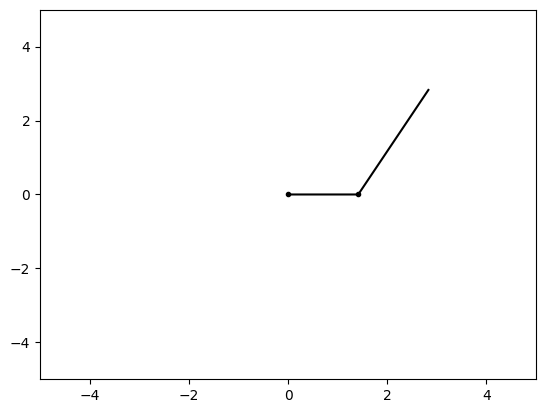

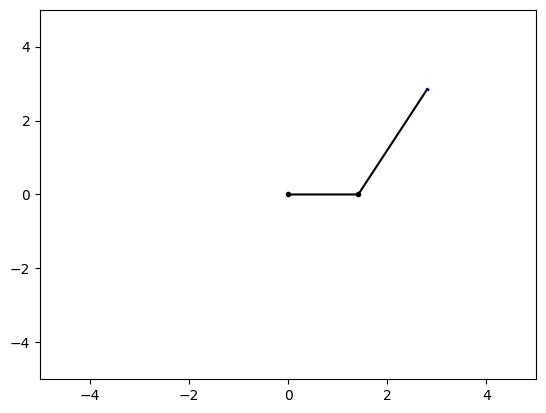

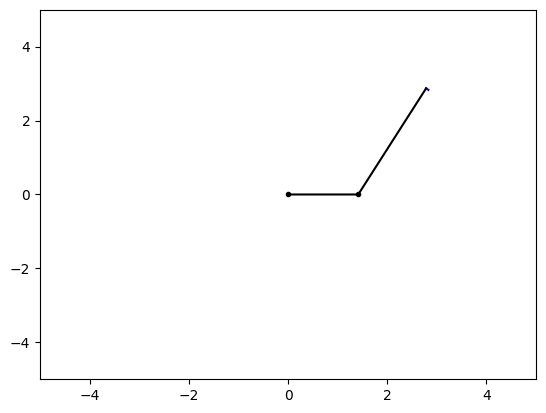

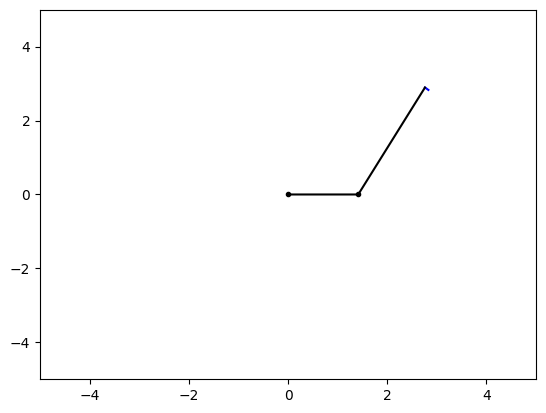

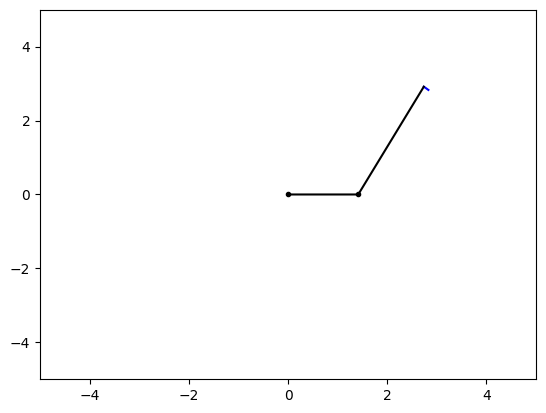

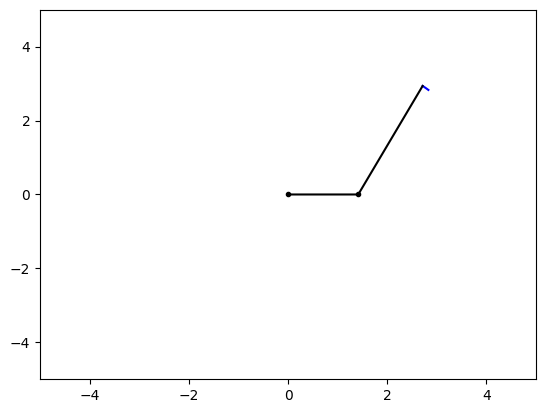

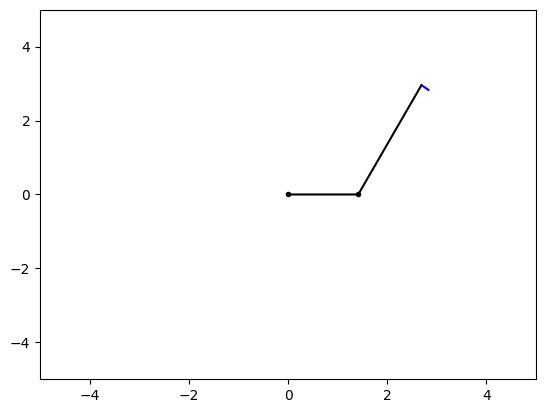

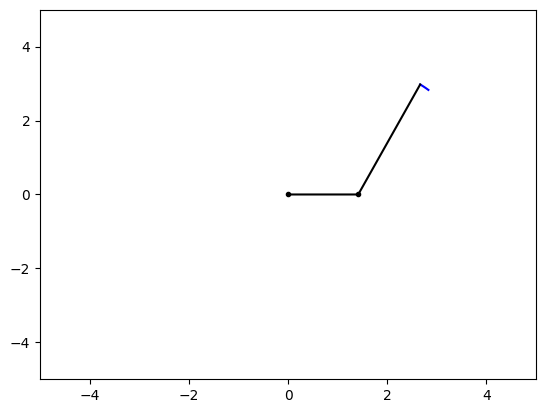

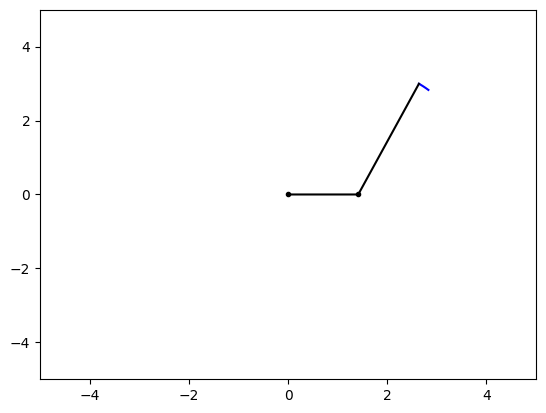

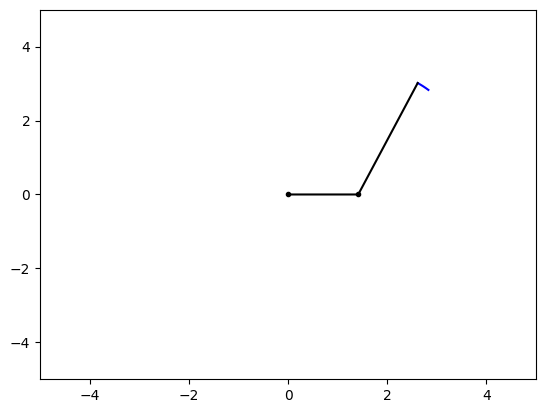

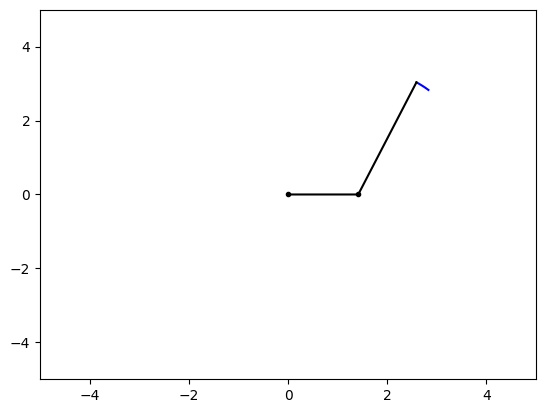

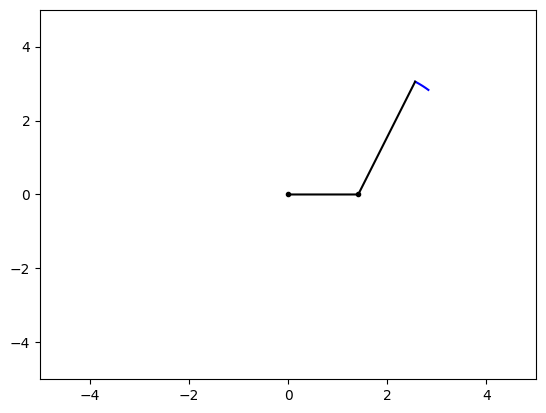

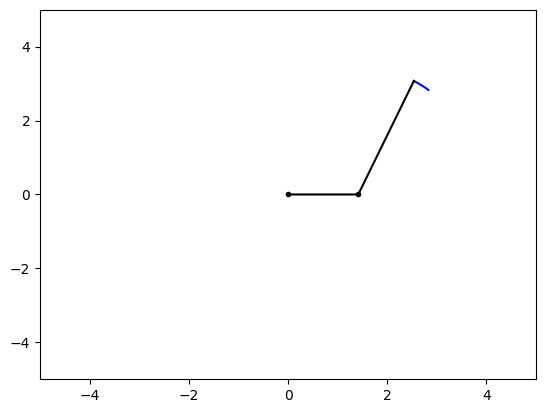

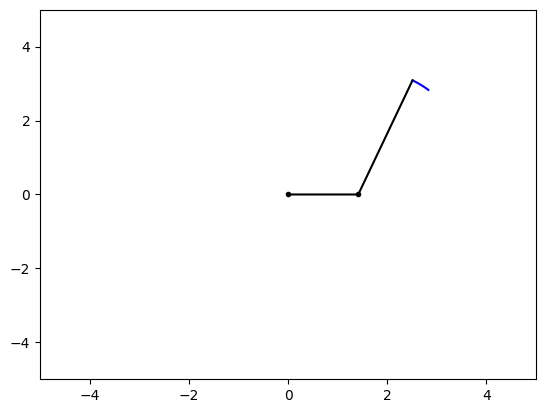

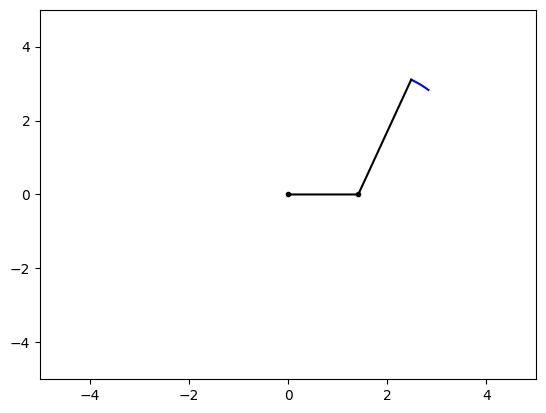

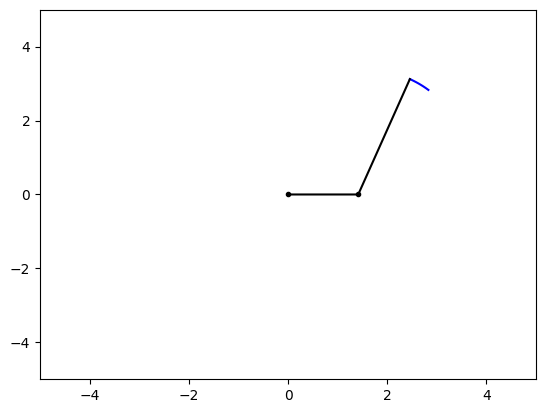

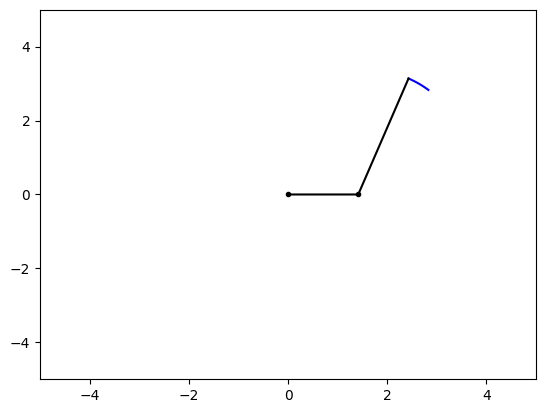

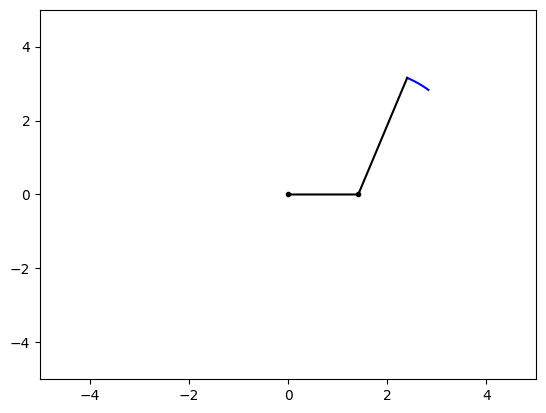

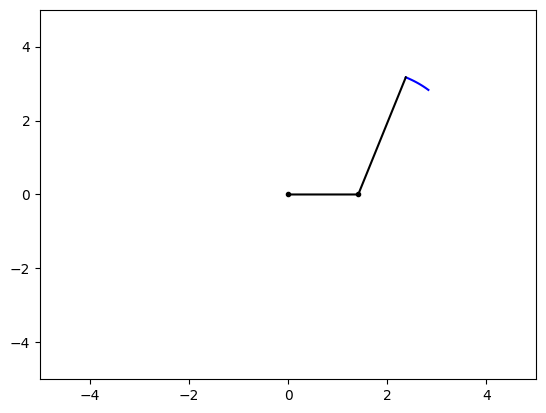

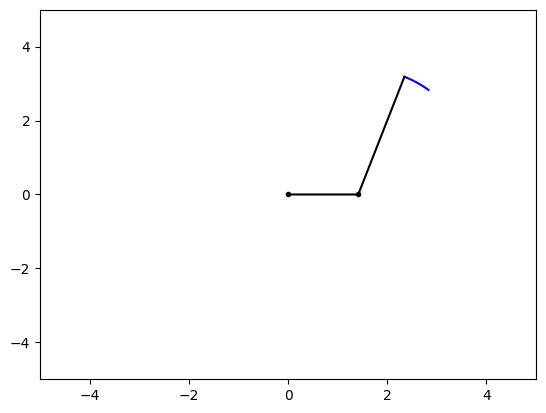

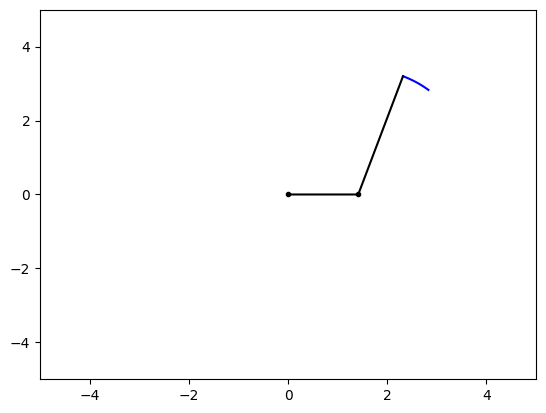

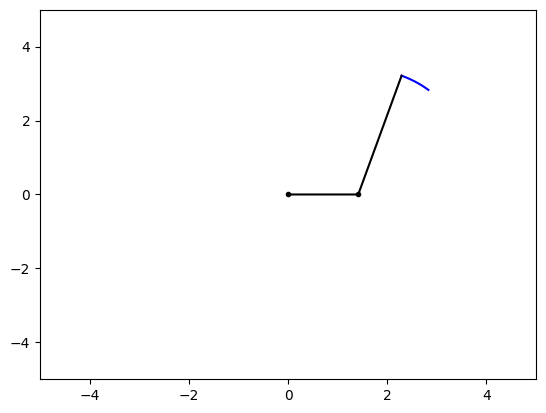

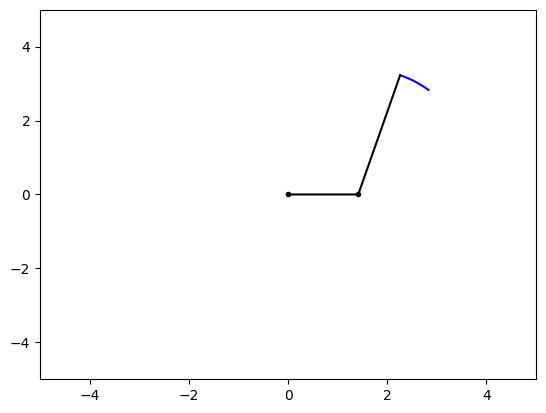

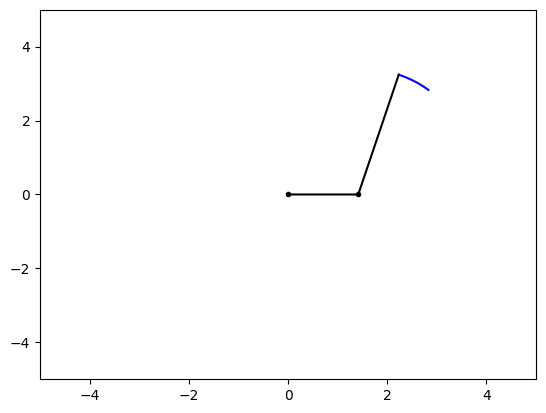

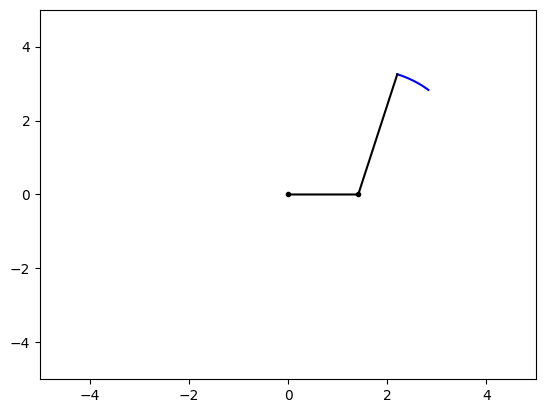

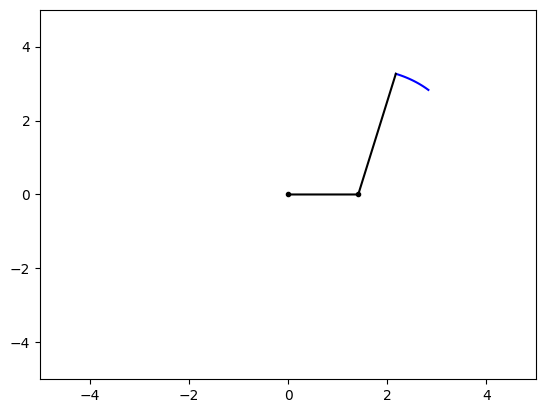

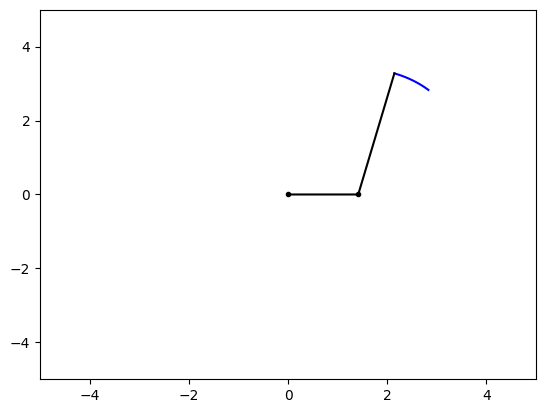

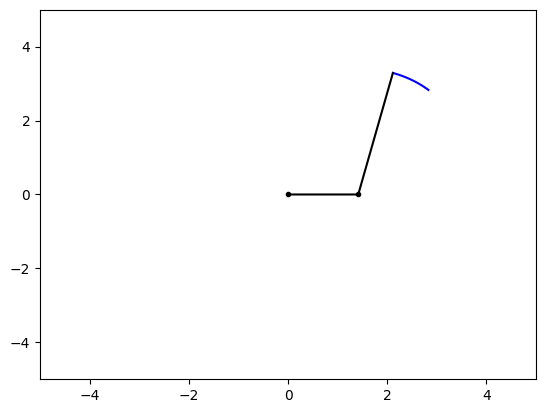

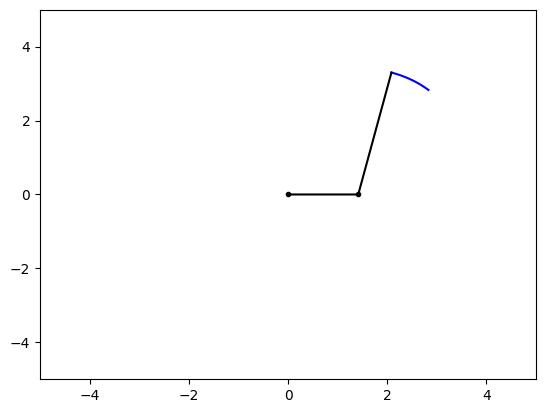

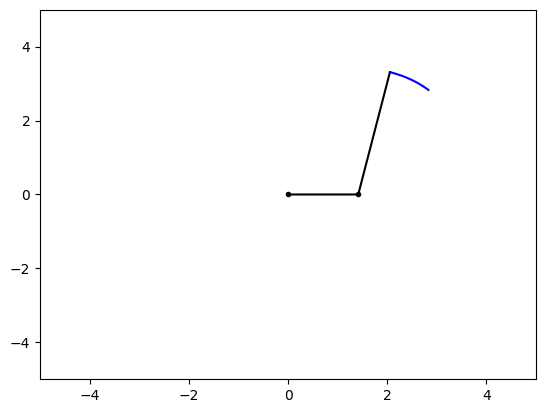

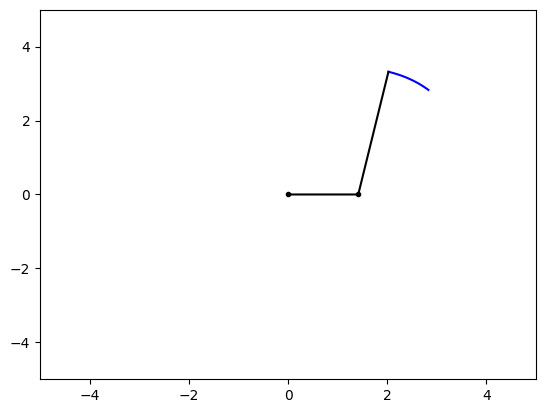

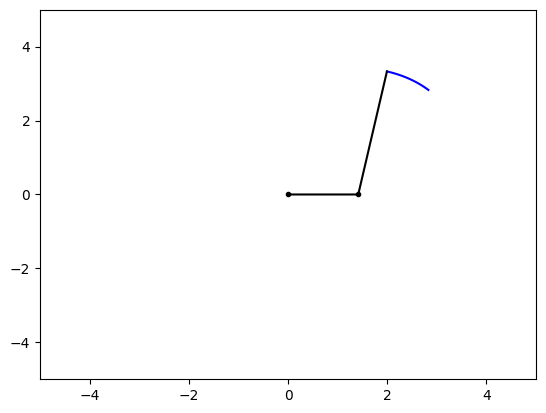

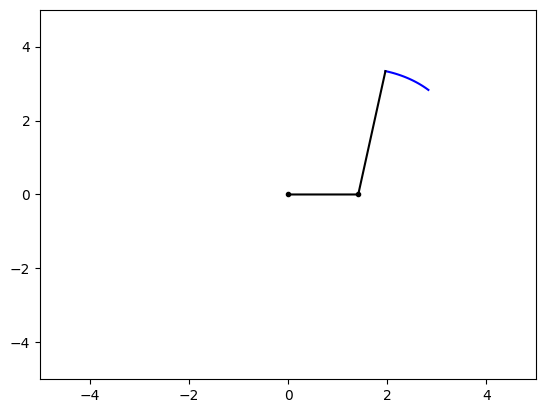

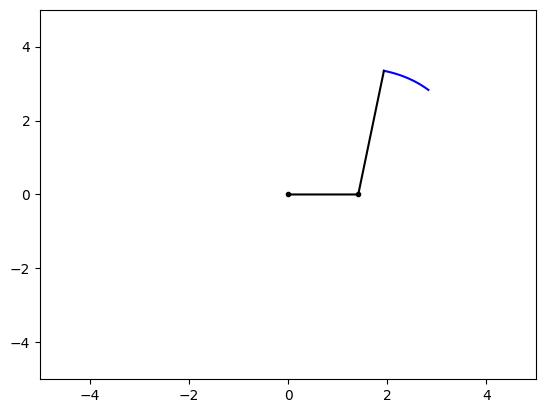

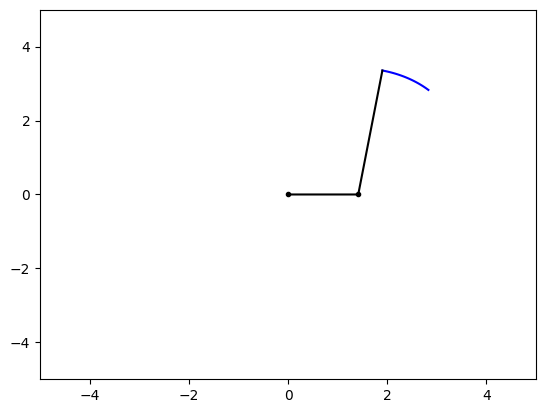

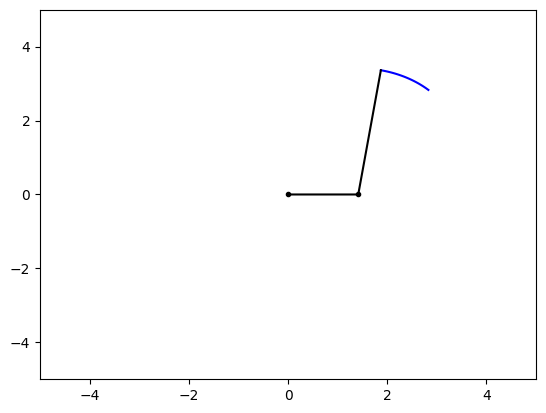

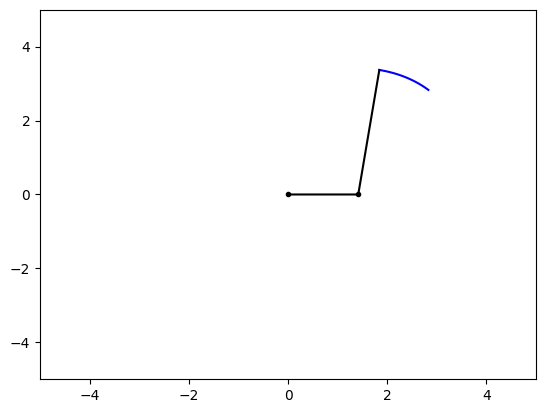

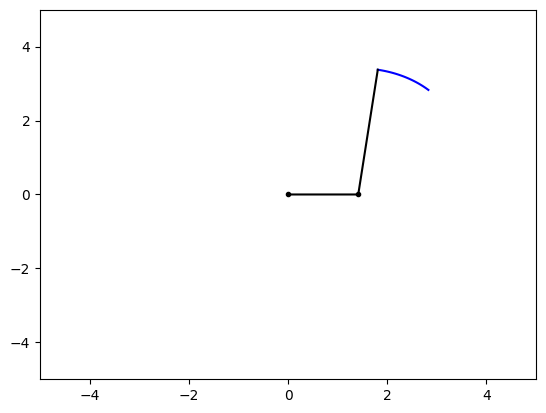

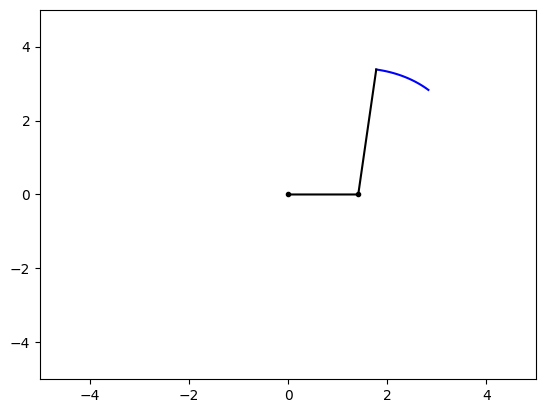

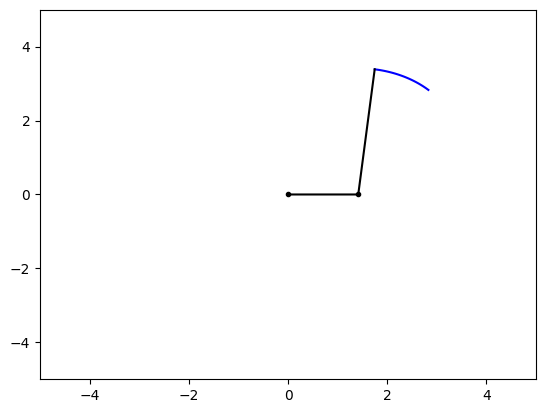

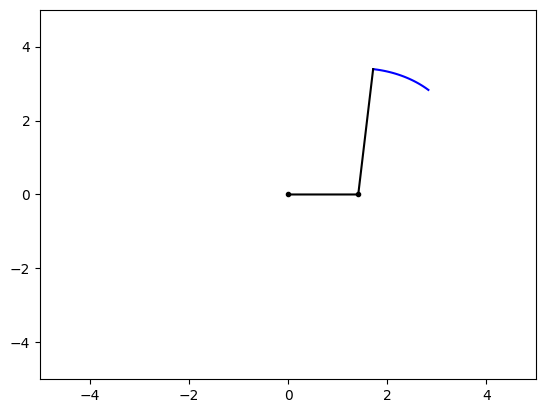

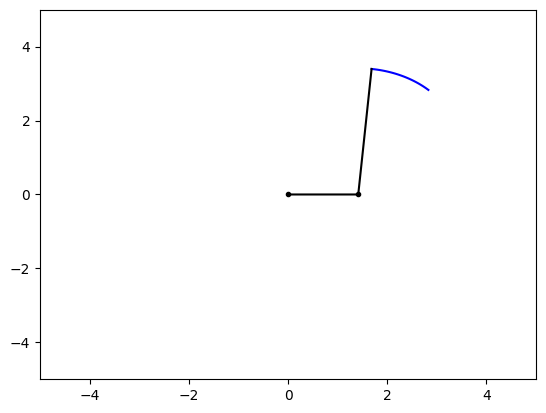

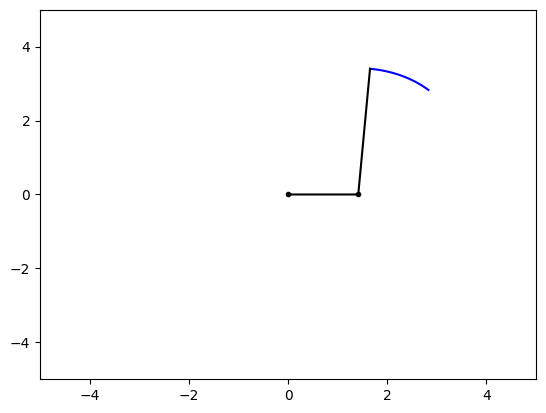

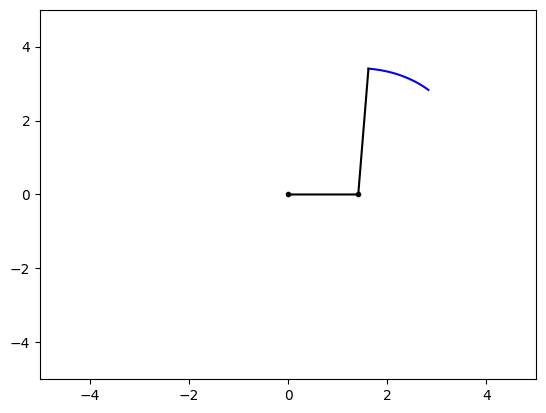

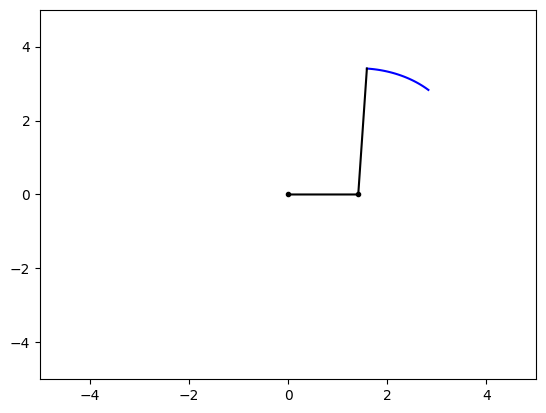

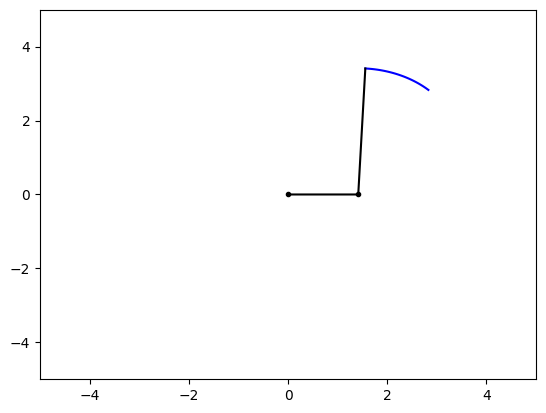

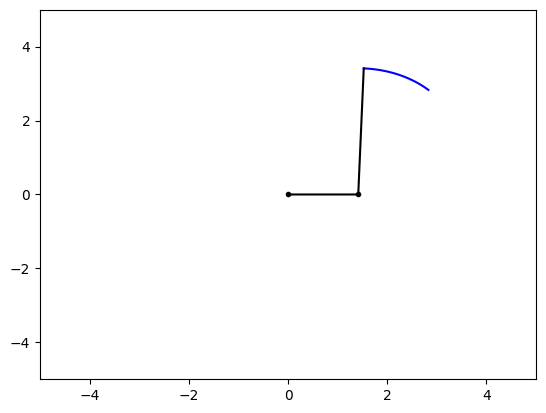

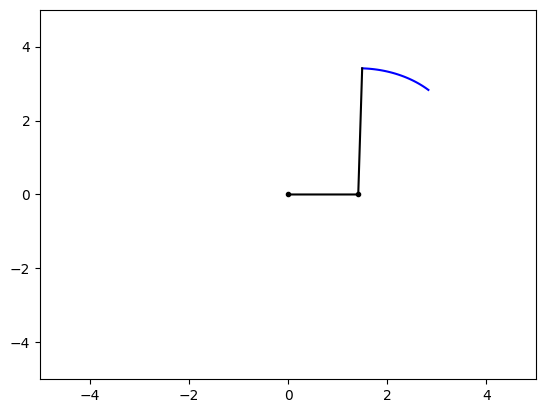

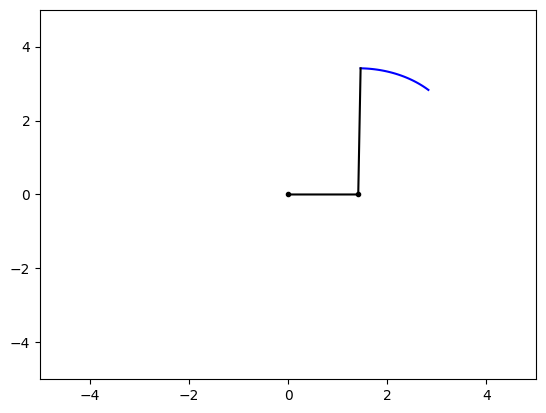

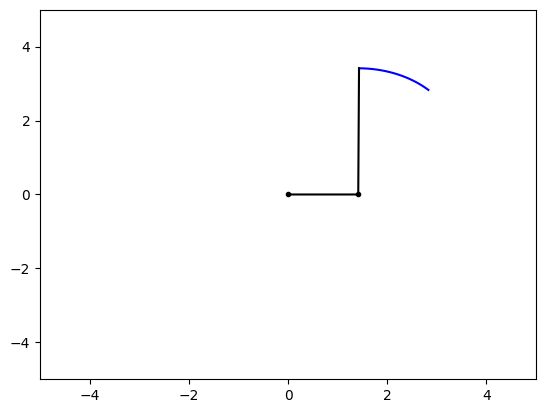

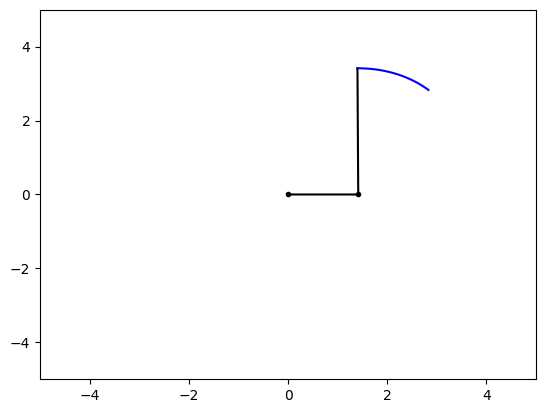

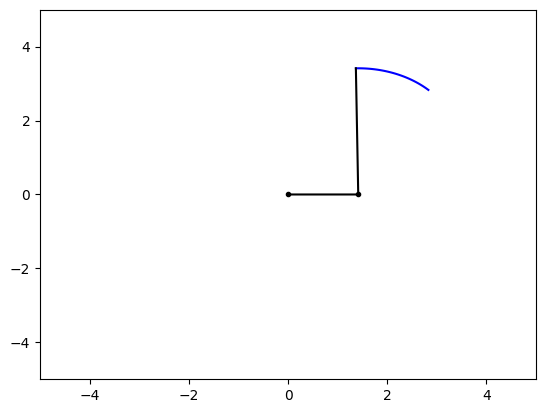

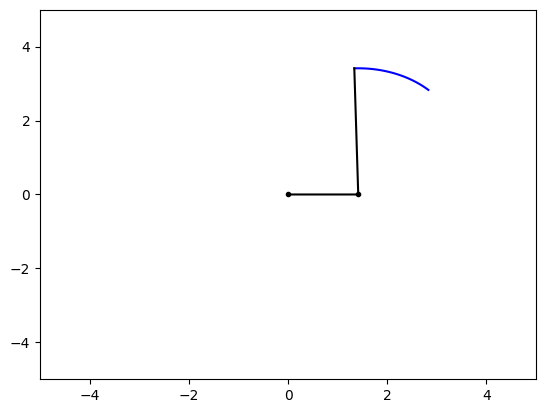

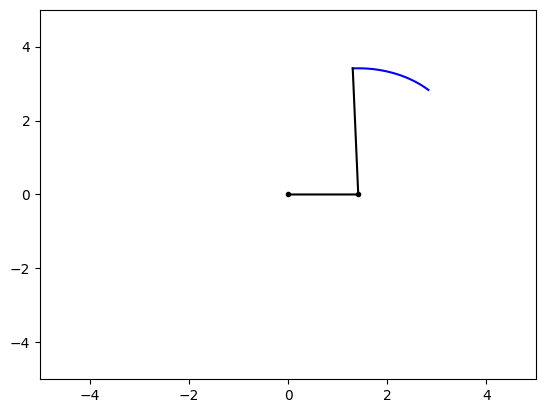

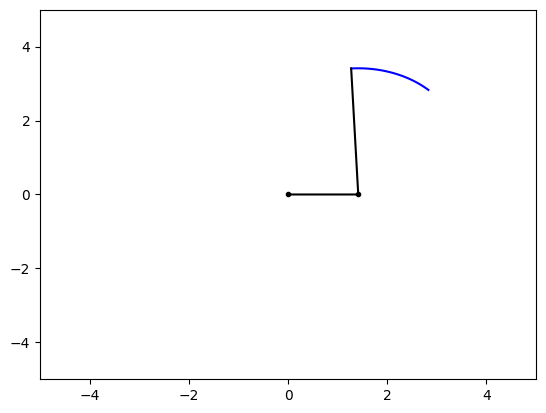

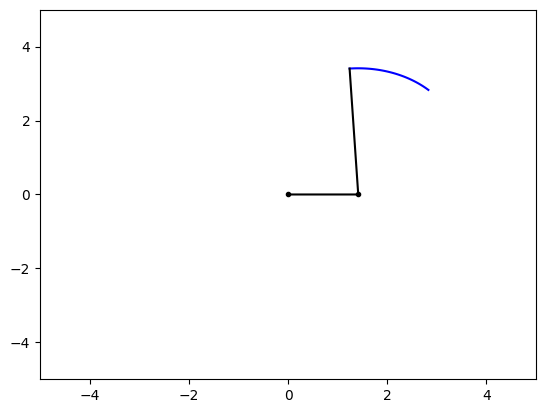

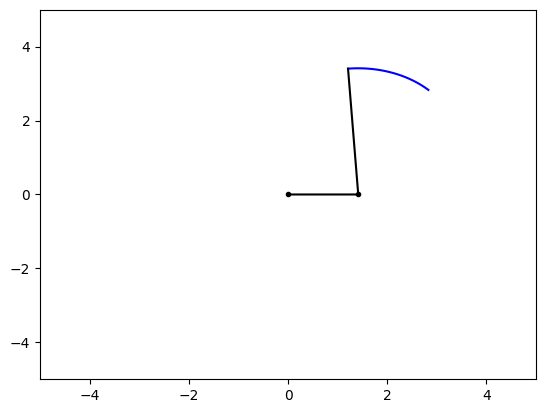

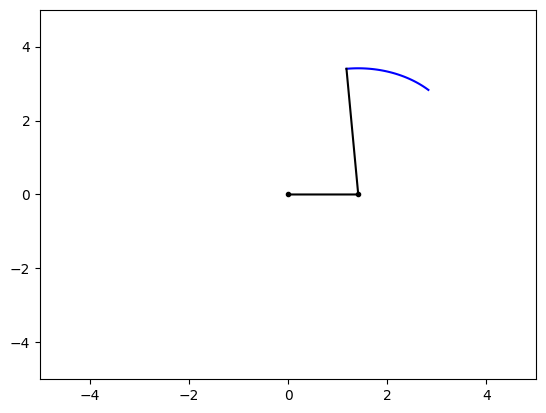

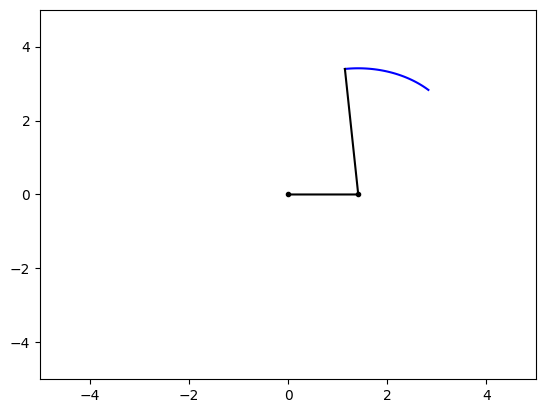

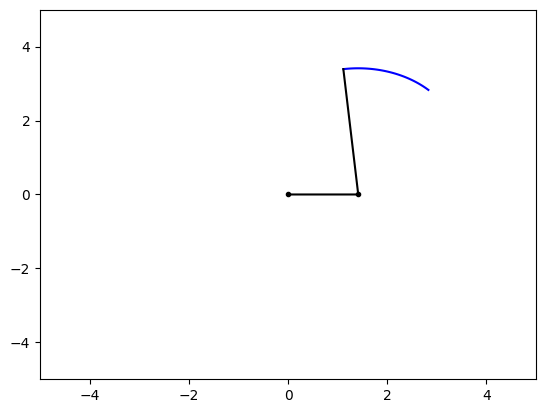

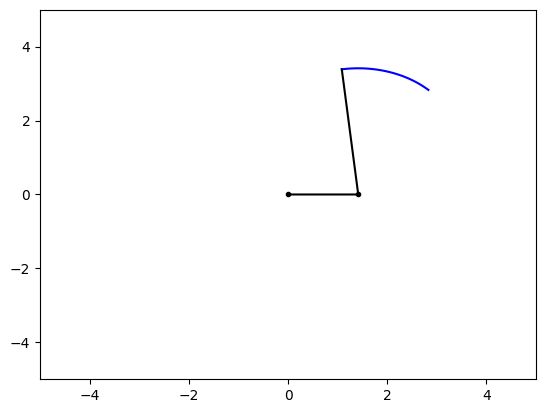

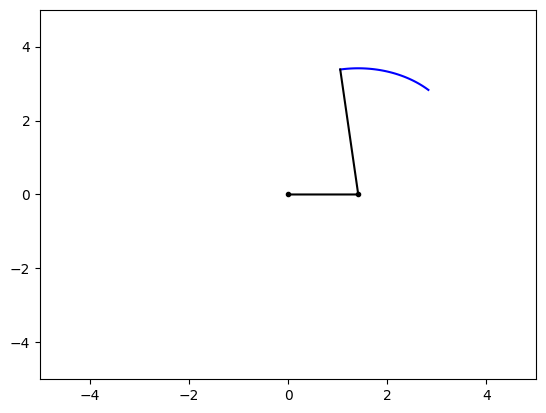

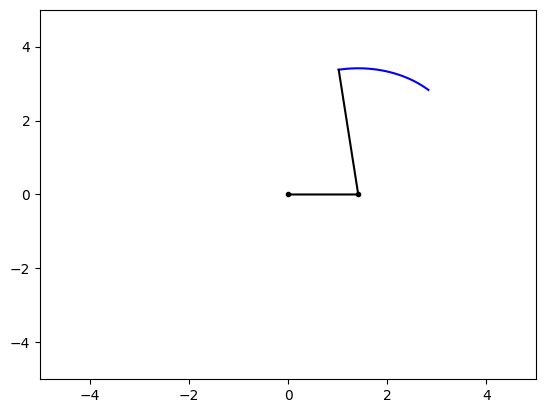

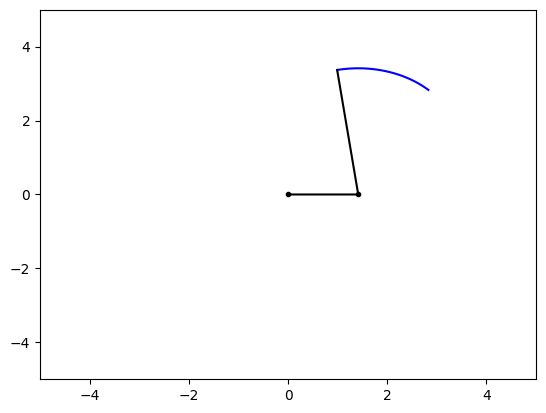

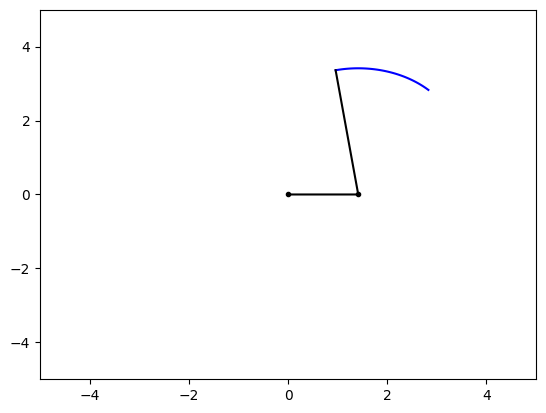

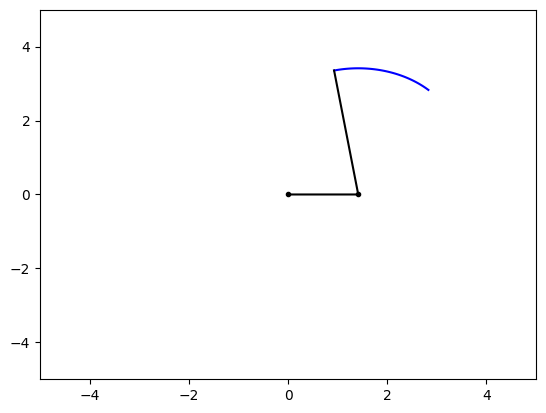

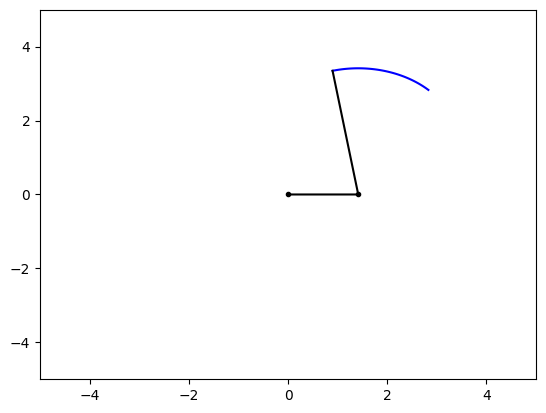

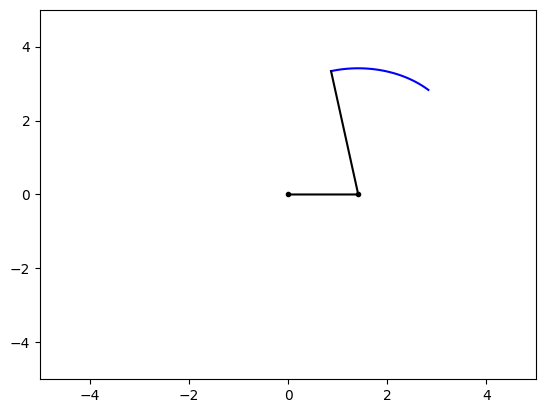

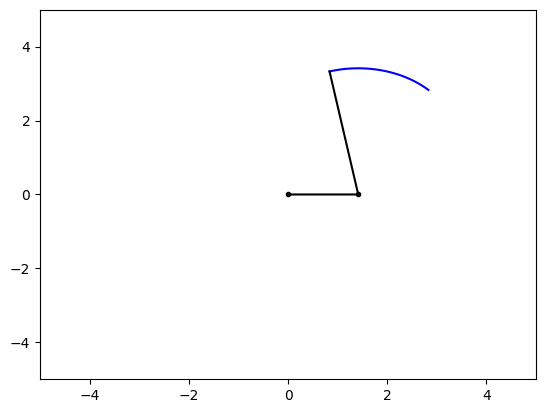

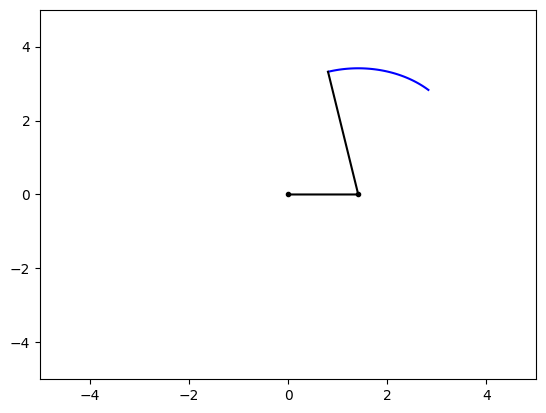

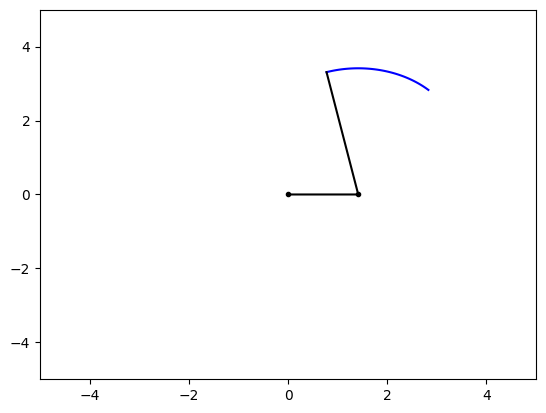

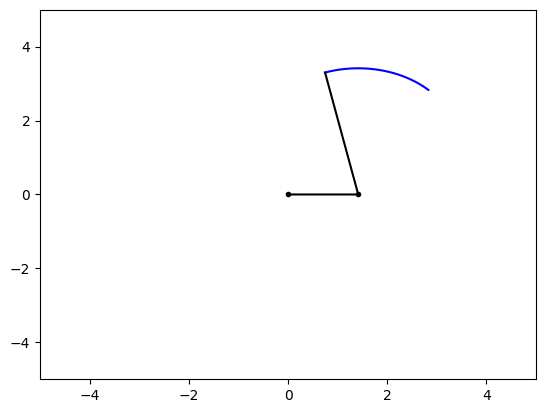

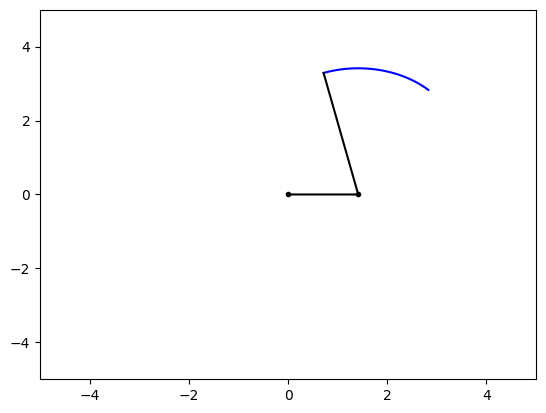

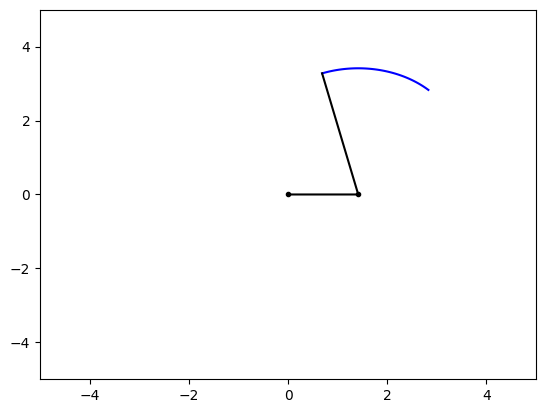

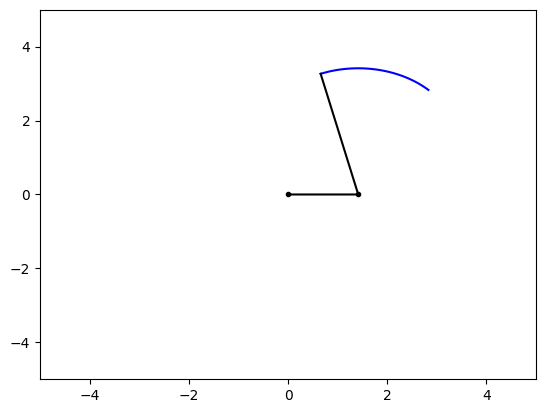

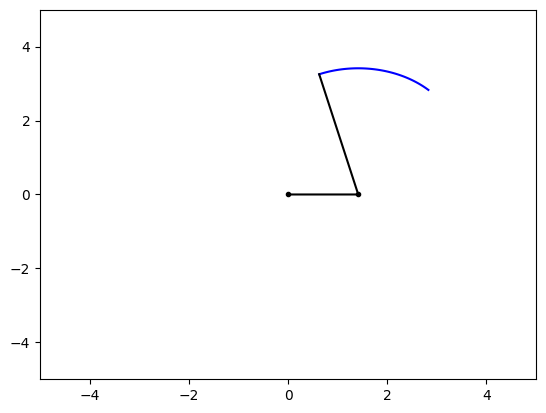

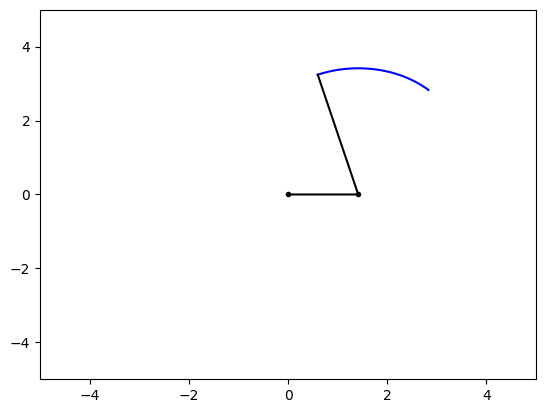

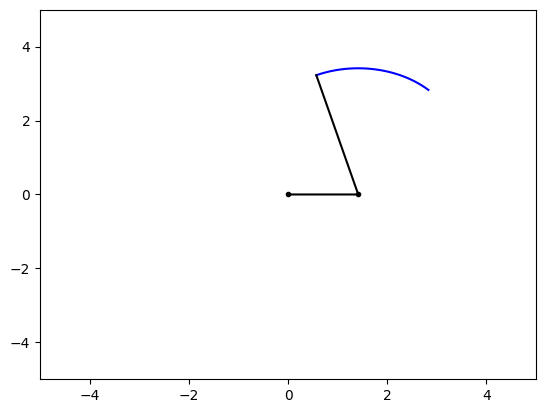

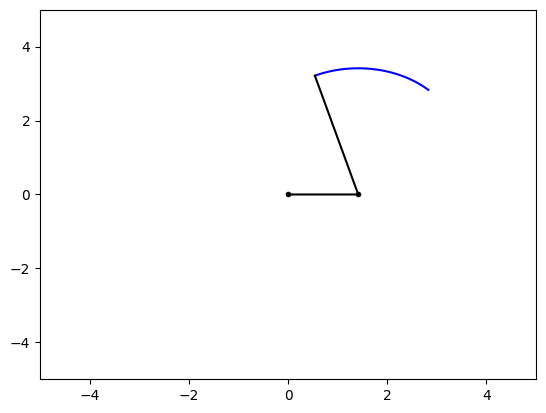

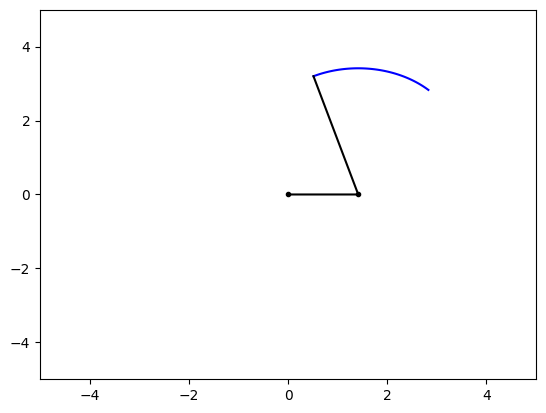

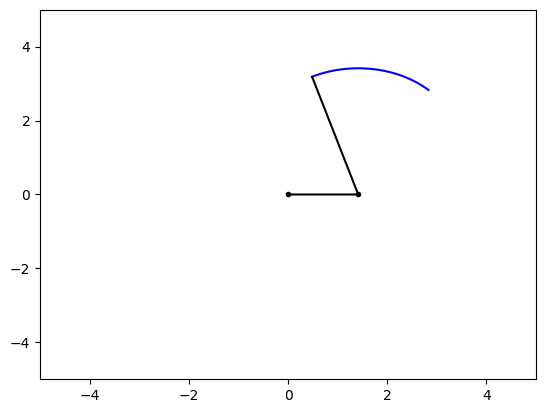

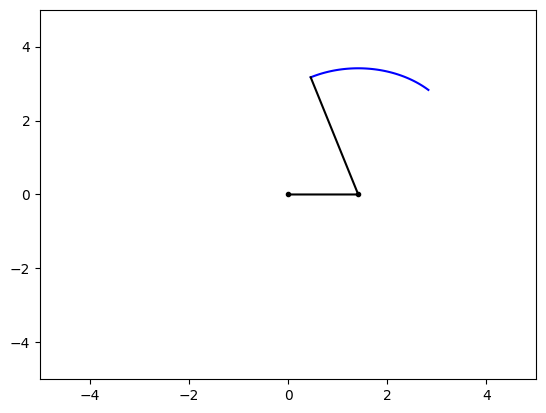

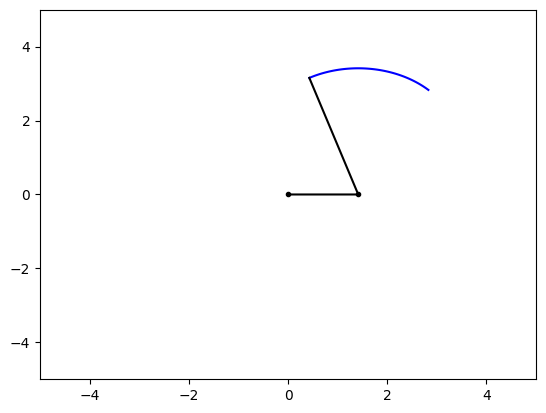

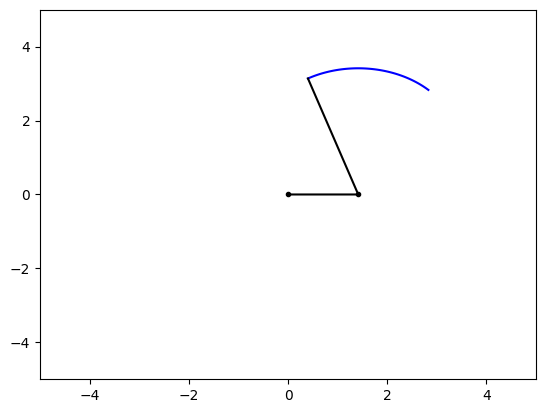

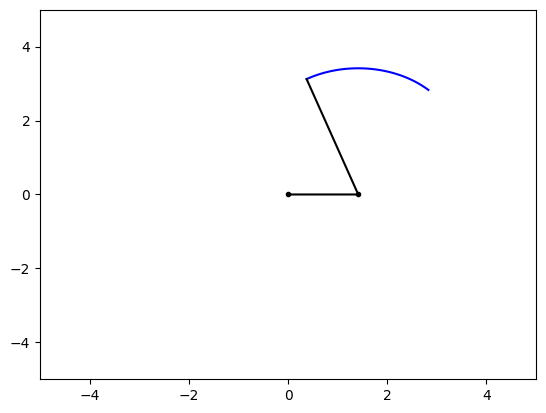

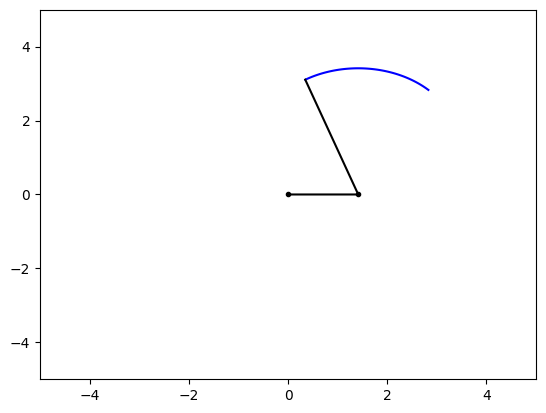

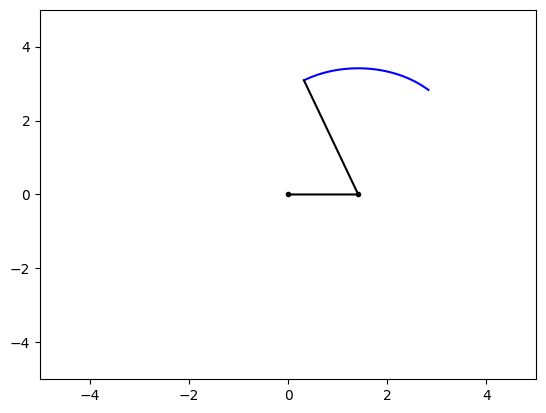

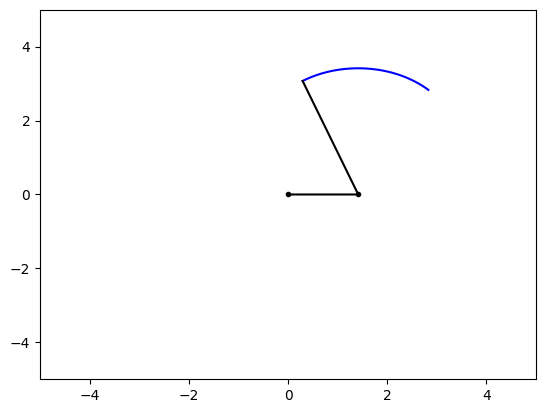

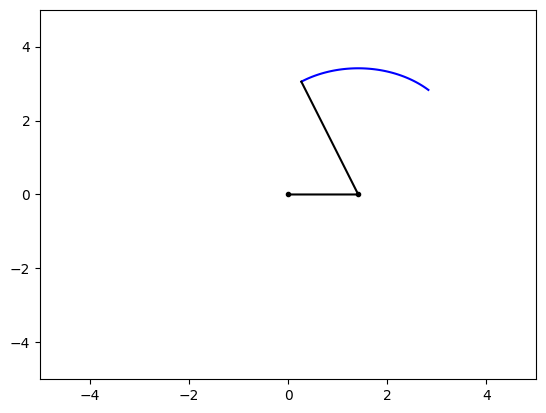

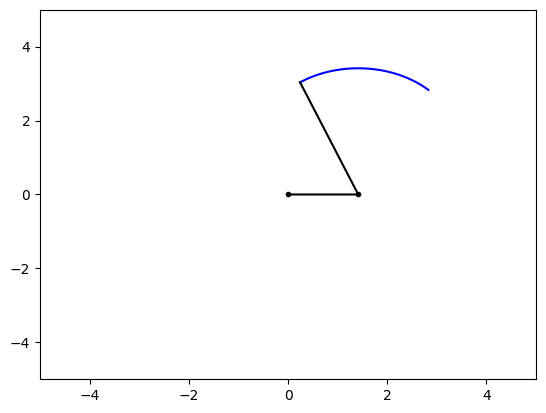

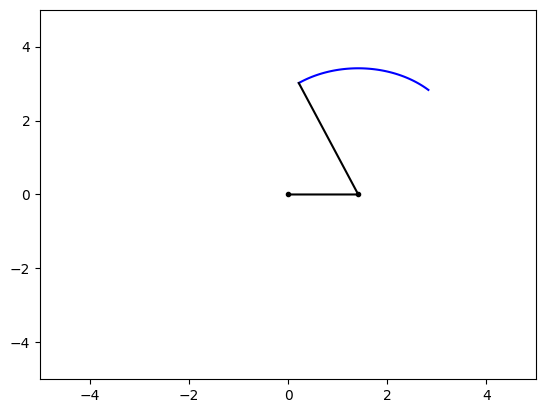

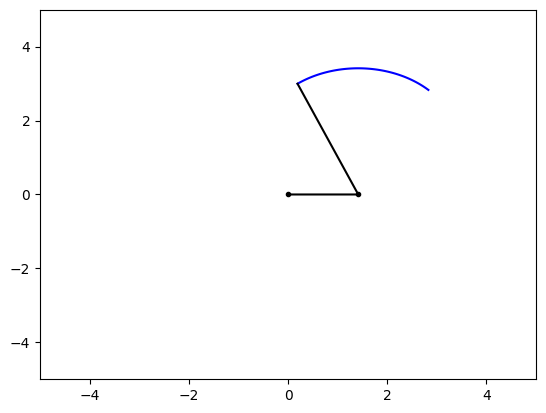

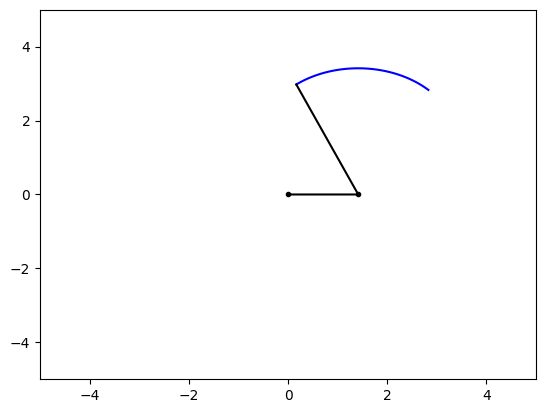

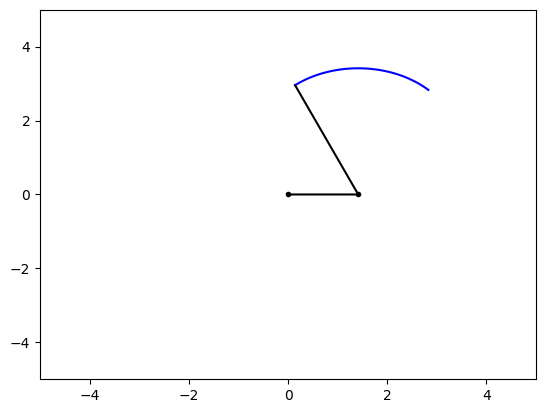

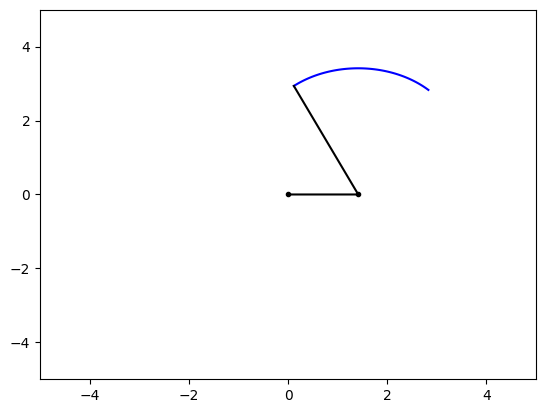

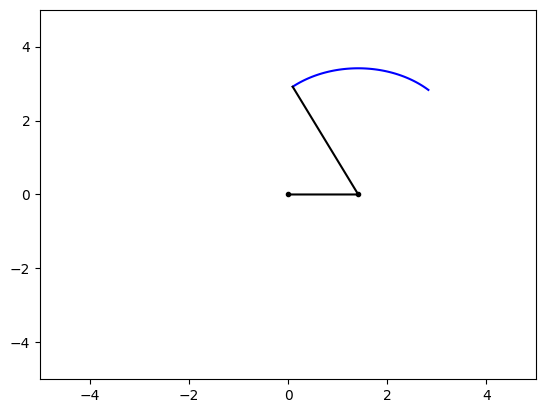

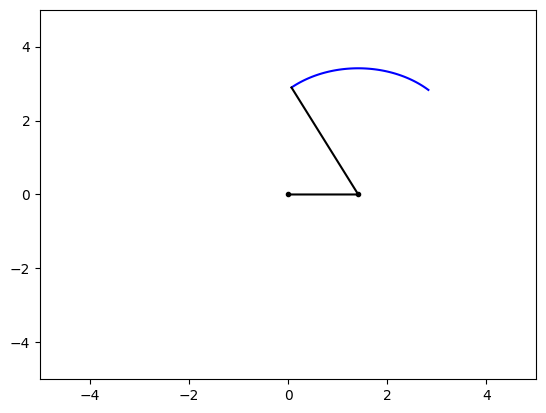

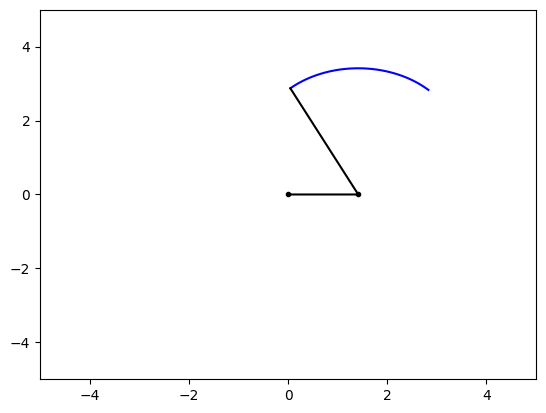

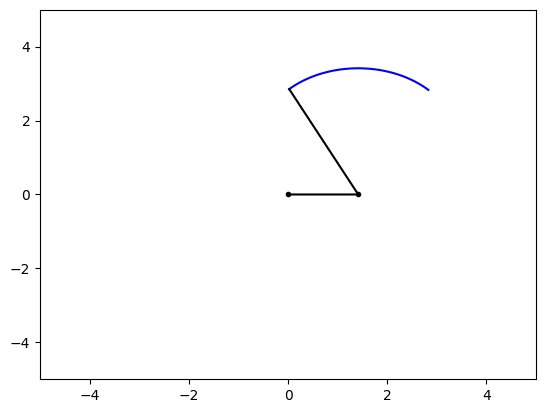

In [20]:
animacion_trayectoria_pcd(q1s, q2s, 2, 2)

**PROBLEMA CINEMÁTICO INVERSO**

**Ejercicio 7**

Implemente una función que resuelva el problema cinemático inverso para un
manipulador RR, esto es, que calcule las variables de articulación dadas las
coordenadas de la posición del extremo del robot

In [21]:
def pci(x, y, l1, l2):
  q2 = np.arccos((x**2 + y**2 - l1**2 - l2**2) / (l1 * l2 * 2))
  q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
  return (q1, q2)

q1, q2 = pci(2, -1, 2, 2)
print(q1)
print(q2)

-1.4412441596460739
1.9551931012905357


Para la realización de este ejercicio se raliza una función llamada *pci*, la cual, dados los valores *x* e *y* de una coordenada y las longitudes *l1* y *l2* obtiene los grados *q1* y *q2* que forman las articulaciones del robot y devuelve los valores.

**Ejercicio 10**

Modifque la función pci para que devuelva todas las soluciones posibles y
a continuación adapte la función dibujar_trayectoria_pci para que escoja la
segunda "mejor" solución de todas las que devuelva pci. Verifque su funcionamiento
volviendo a analizar las trayectorias del ejercicio anterior.

In [22]:
def pci_2(x, y, l1, l2):
  q2a = np.arccos((x**2 + y**2 - l1**2 - l2**2) / (l1 * l2 *2))
  q1a = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2a), l1 + l2 * np.cos(q2a))
  q2b = -q2a
  q1b = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2b), l1 + l2 * np.cos(q2b))
  q1a %= 2 * np.pi
  q2a %= 2 * np.pi
  q1b %= 2 * np.pi
  q2b %= 2 * np.pi
  return (q1a, q2a, q1b, q2b)

**Ejercicio 8**

Implemente las funciones equivalentes a dibujar_trayectoria_pcd y
animacion_trayectoria_pcd para el problema cinemático inverso.

In [23]:
def dibujar_trayectoria_pci(xs, ys, l1, l2):
  n = min(len(xs), len(ys))
  q1 = 0
  q2 = 0
  for i in range(n):
    q1a, q2a, q1b, q2b = pci_2(xs[i], ys[i], l1, l2)
    dif_a = abs(q1 - q1a)
    if(dif_a > np.pi):
      dif_a = 2 * np.pi - dif_a
    dif_b = abs(q1 - q1b)
    if(dif_b > np.pi):
      dif_b = 2 * np.pi - dif_b
    if(dif_a < dif_b):
      q1 = q1a
      q2 = q2a
    else:
      q1 = q1b
      q2 = q2b

  plt.plot(xs, ys, 'b')
  limite = l1 + l2 + 1
  plt.xlim([-limite, limite])
  plt.ylim([-limite, limite])
  dibujar_robot(q1, q2, 2, 2)

xs = np.linspace(-1, 2, 100)
ys = np.linspace(1, -2, 100)

Se ha creado un método llamado *dibujar_trayectoria_pci* al cual se le pasa por parámetro dos vectores de coordenadas *xs* e *ys* y las longitudes *l1* y *l2*. Esta función calcula los grados *q1* y *q2* correspondientes a cada elemento de *xs* e *ys* haciendo uso del método *pci*. En este código, aunque se pide en el ejercicio 10, se tiene en cuenta que hay dos soluciones posibles devueltas por *pci*, por lo que la función busca la "mejor solución" de ambas. Al calcular todas las coordenadas se pinta en una gráfica. Lo que se observa en la gráfica es el movimiento que debe efectuar el brazo robótico para pasar por los puntos que se han especificado en los vectores *xs* e *ys*.

También se define la función *animacion_trayectoria_pci*, la cual muestra todos los movimientos que realiza el brazo robótico de forma animada. De esta forma, dados los vectores de coordenadas *xs* e *ys* y las longitudes *l1* y *l2*, por cada elemento en los vectores se hace una llamada al método *dibujar_trayectoria_pci*.

**Ejercicio 9**

Compruebe que dibujar_trayectoria_pci y animacion_trayectoria_pci funcionan correctamente analizando el valor de las variables articulares cuando el extremo
del robot se mueve:

Desde el punto (2, 0) hasta el punto (0, 2) en línea recta.

Desde el punto (1, 1) hasta el punto (−2, 1) en línea recta.

Desde el punto (1, 0) hasta el punto (−1, 0) en línea recta.

Desde el punto (−2, 0) hasta el punto (2, 1) en línea recta.

Si al resolver el problema cinemático inverso ha calculado el arcotangente
usando la función arctan de numpy, el robot se comportará de modo extraño al
trazar las trayectorias anteriores

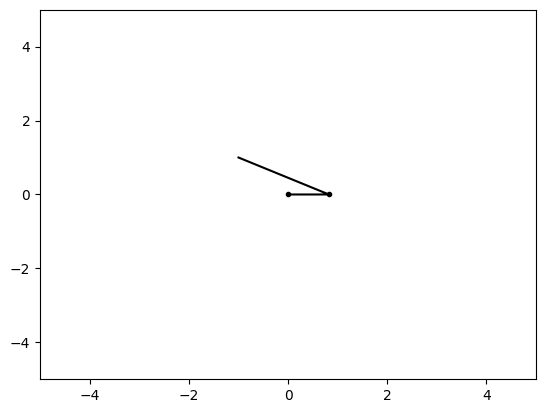

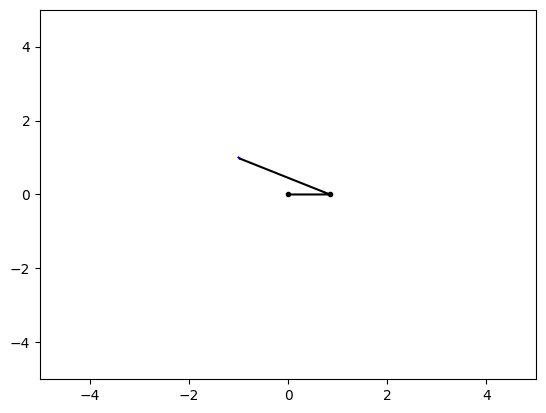

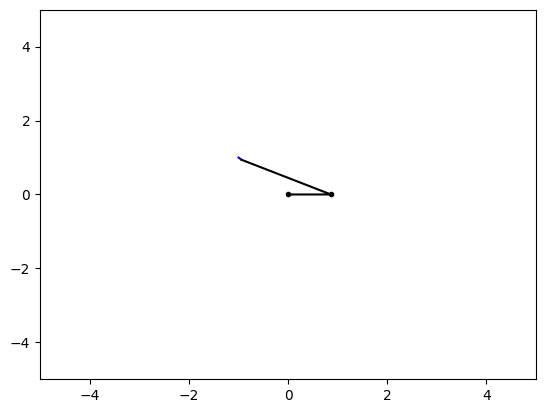

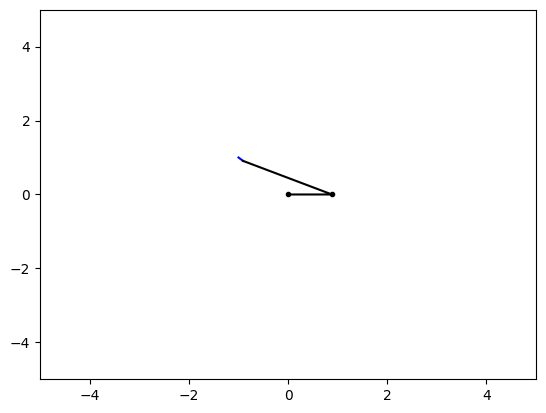

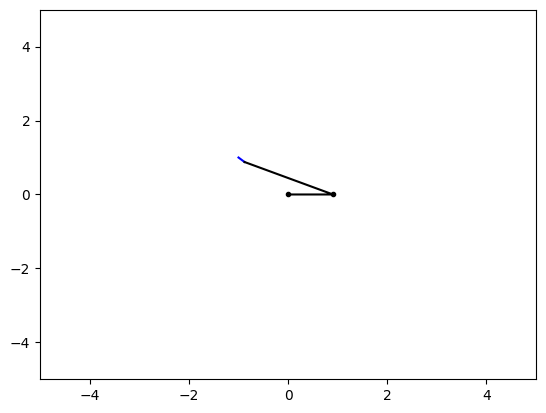

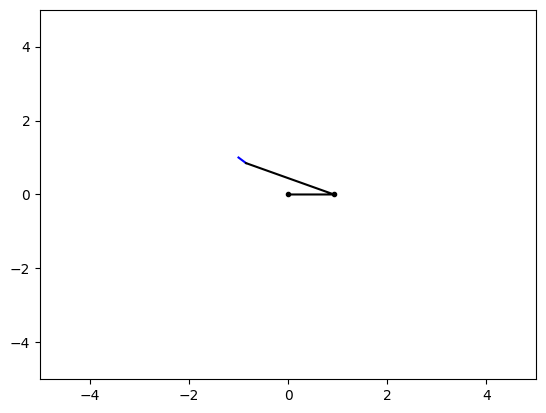

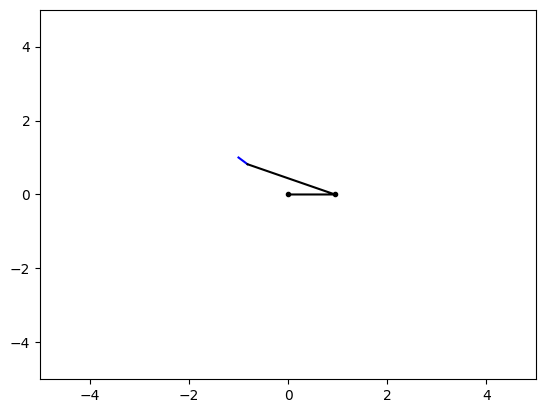

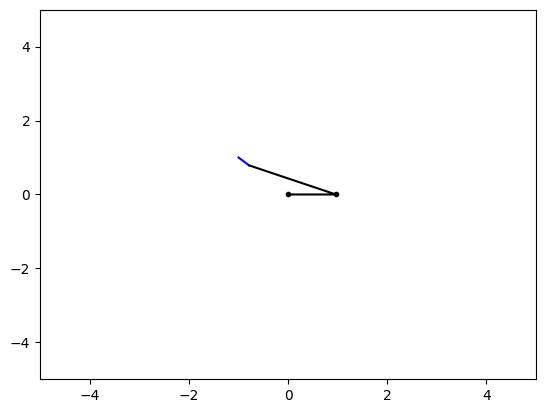

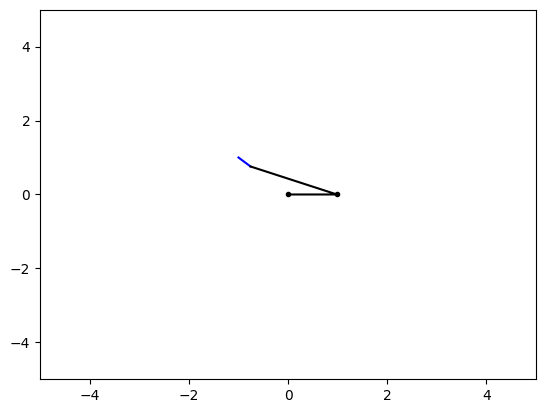

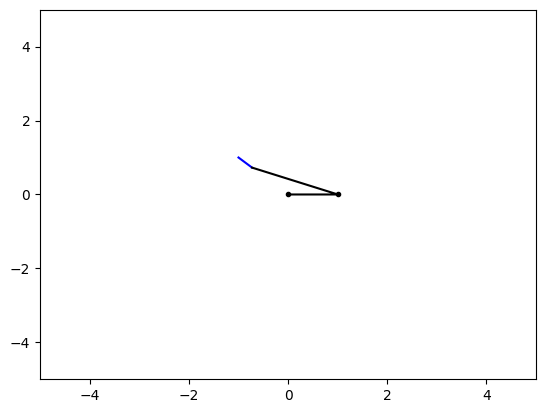

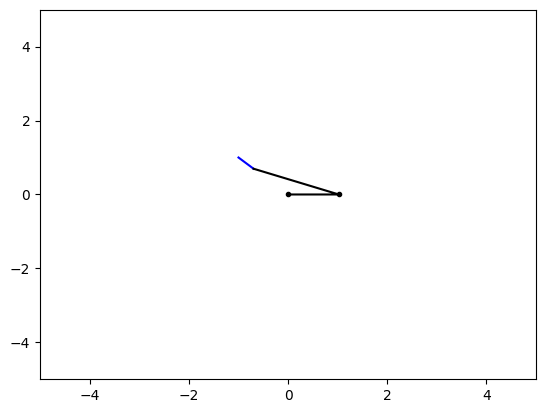

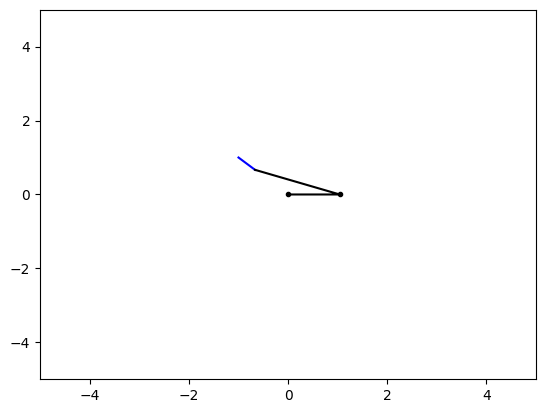

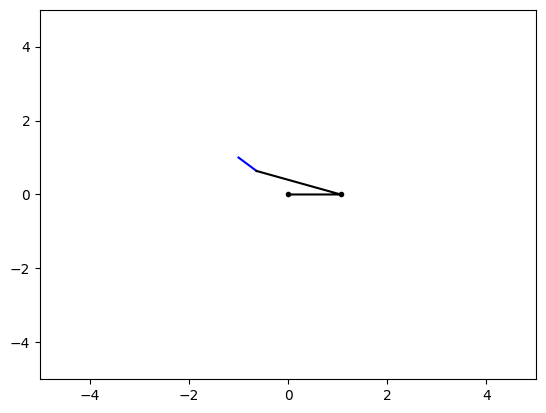

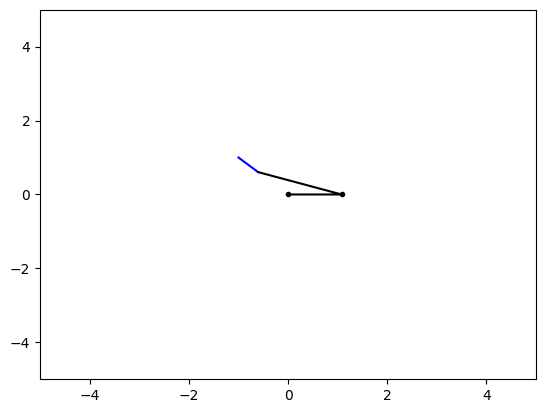

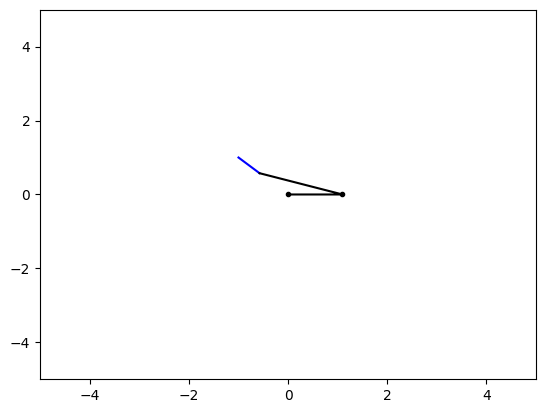

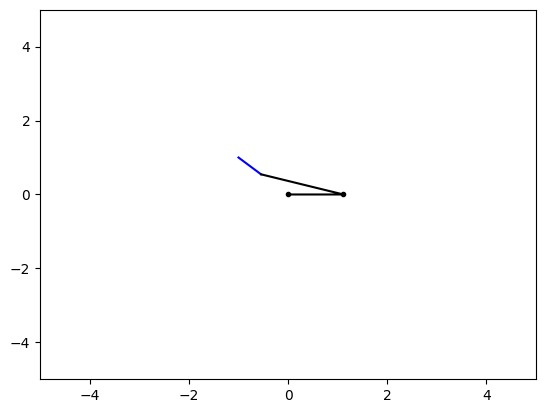

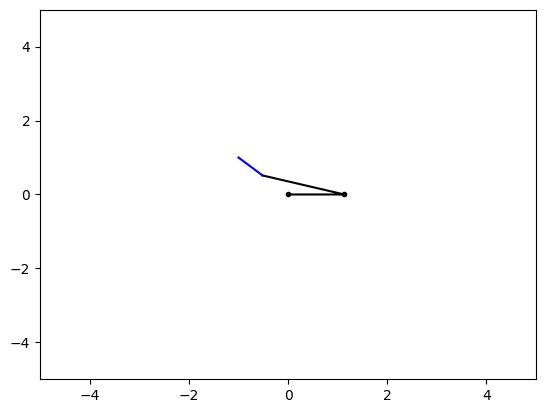

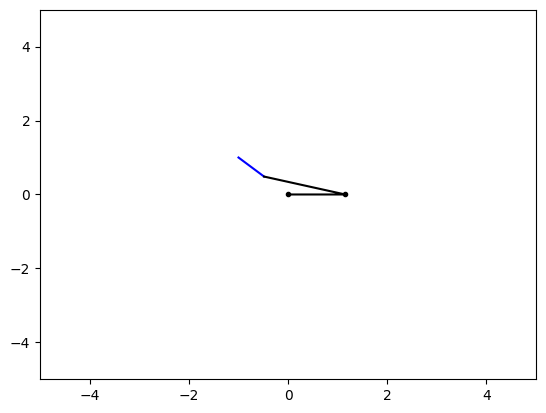

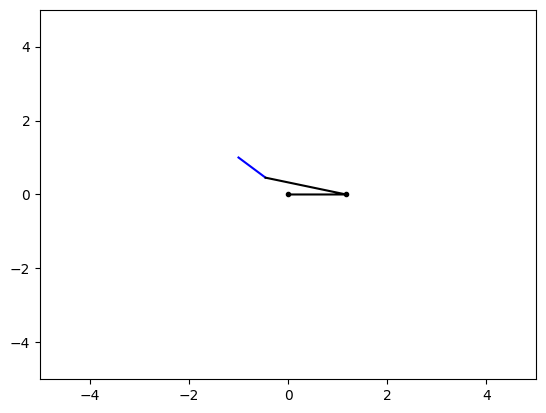

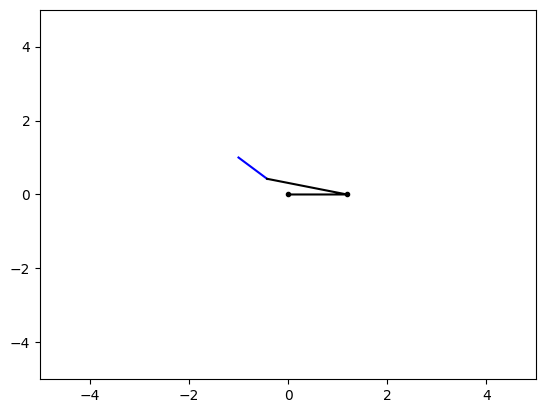

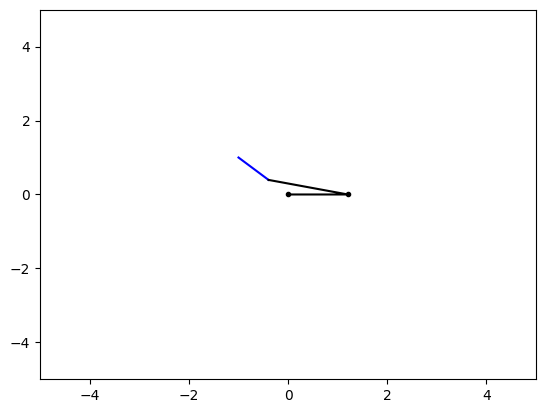

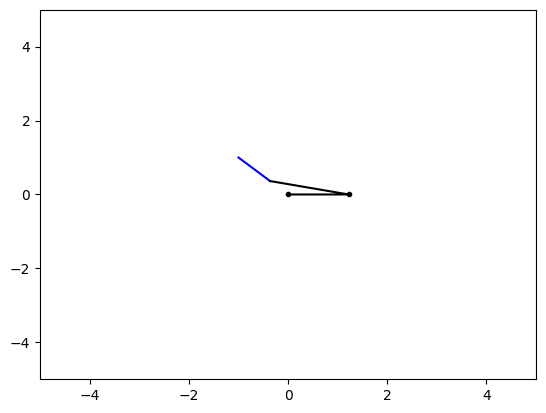

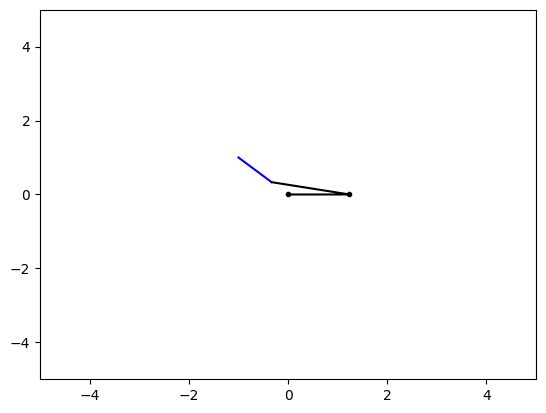

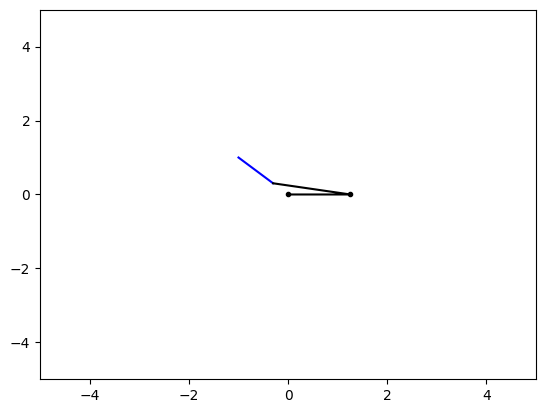

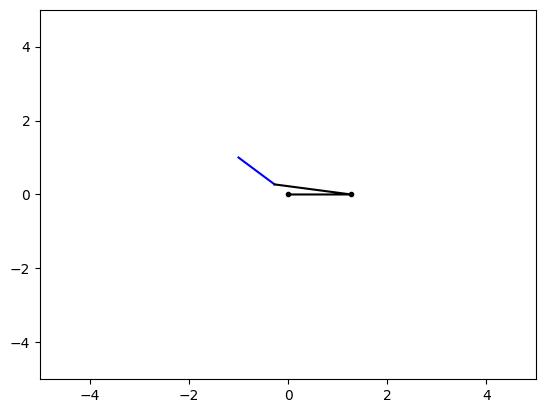

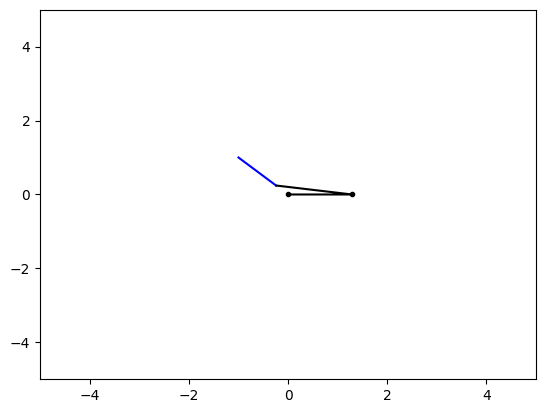

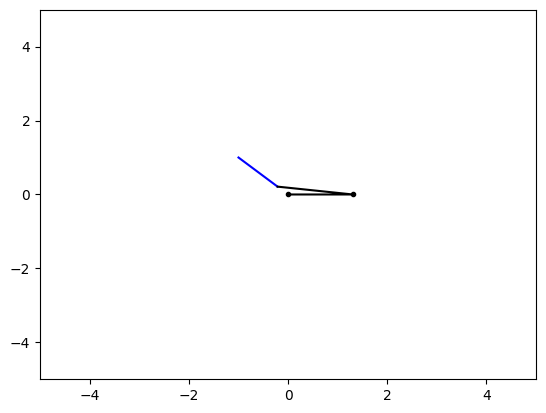

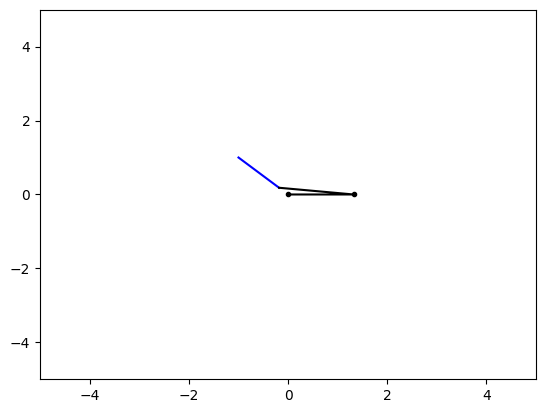

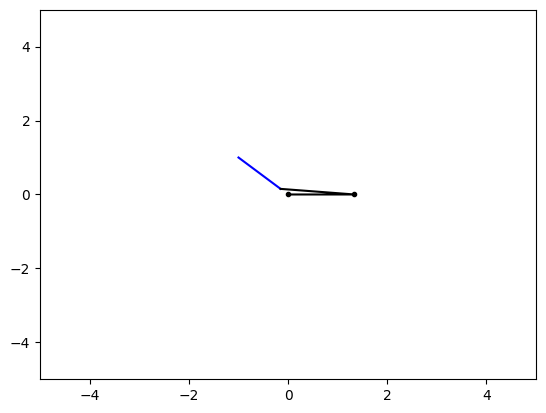

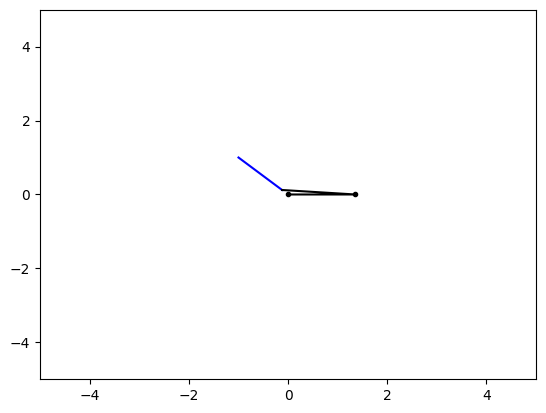

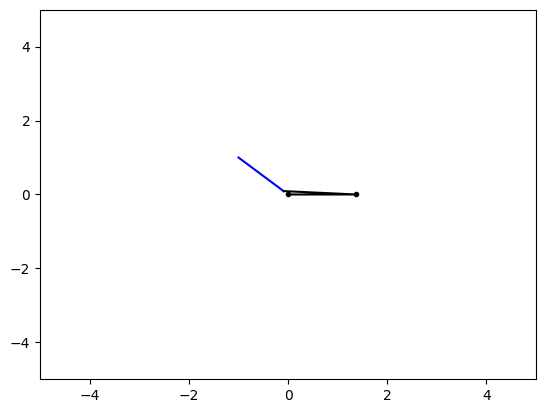

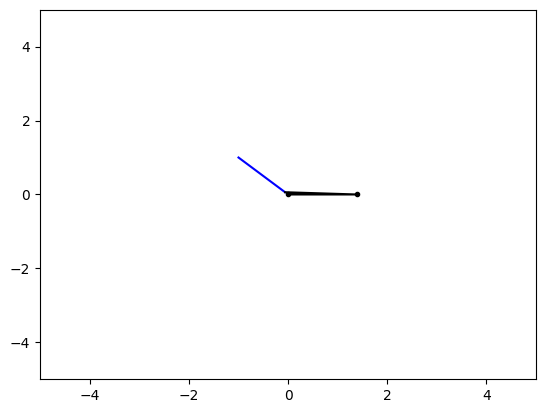

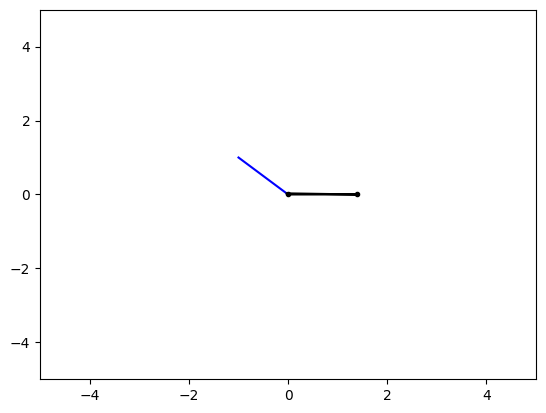

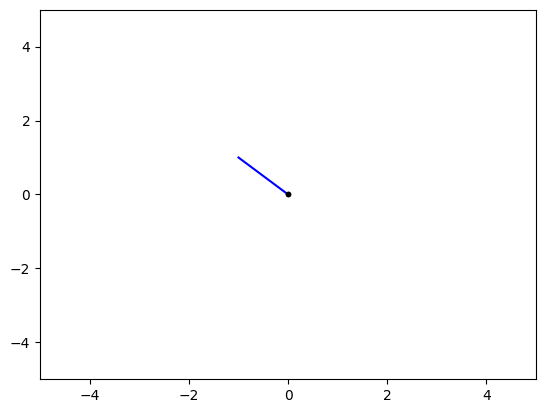

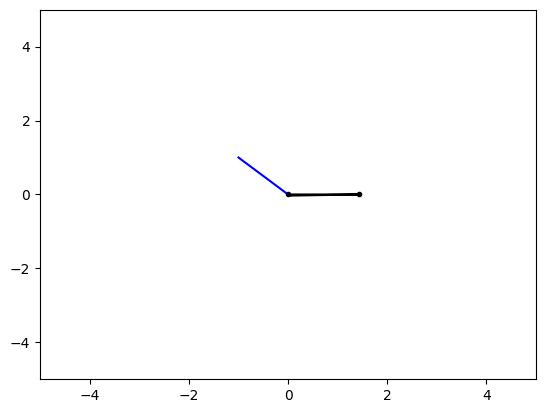

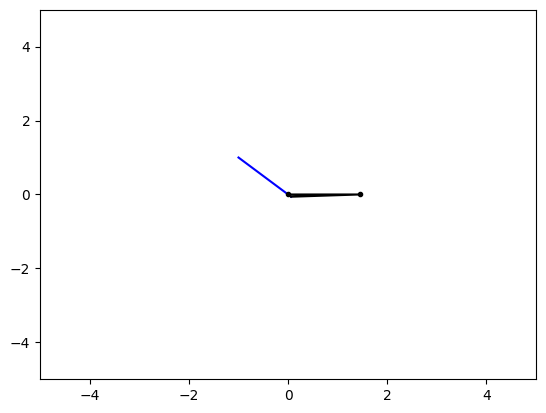

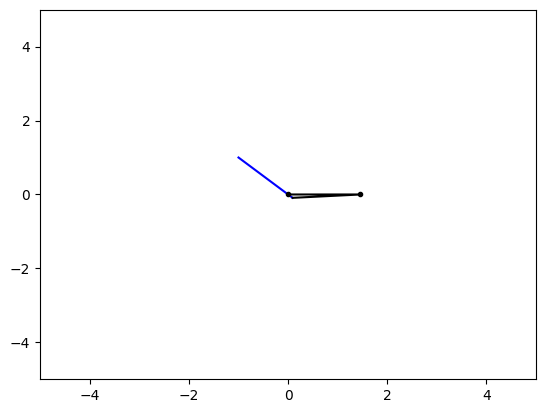

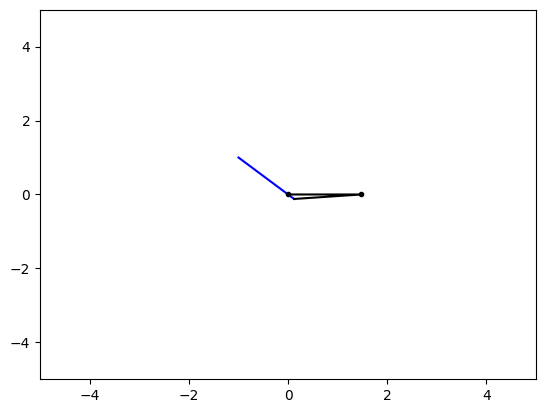

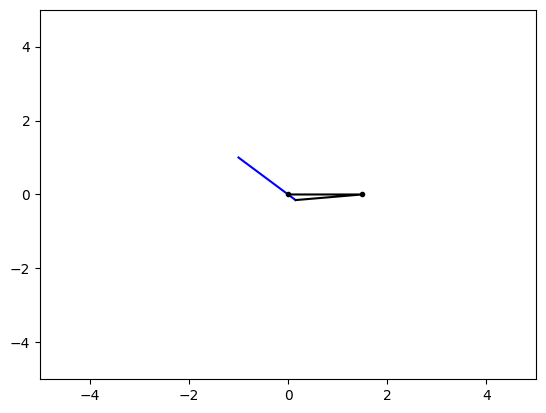

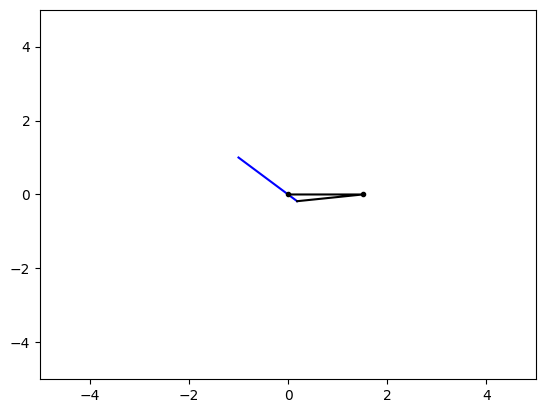

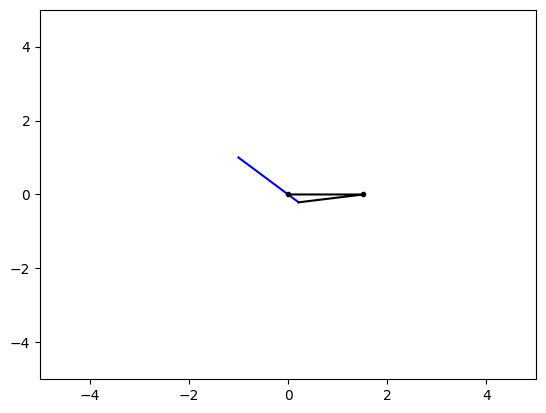

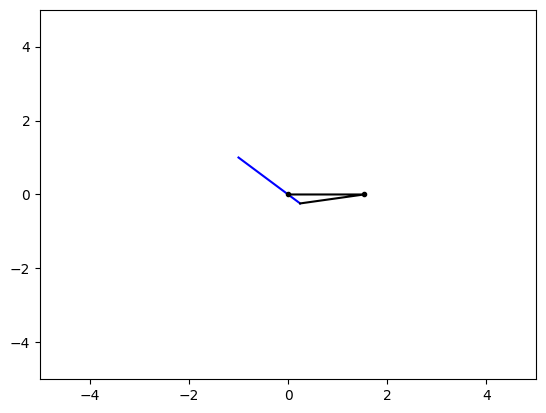

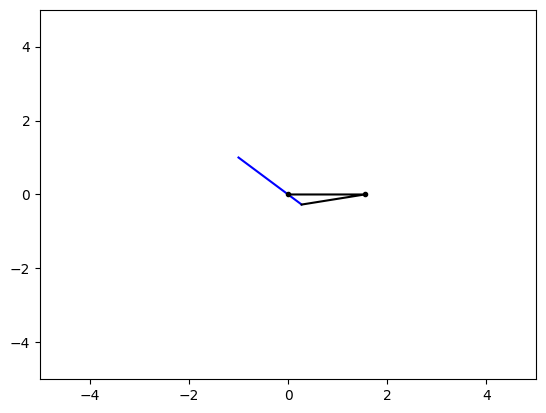

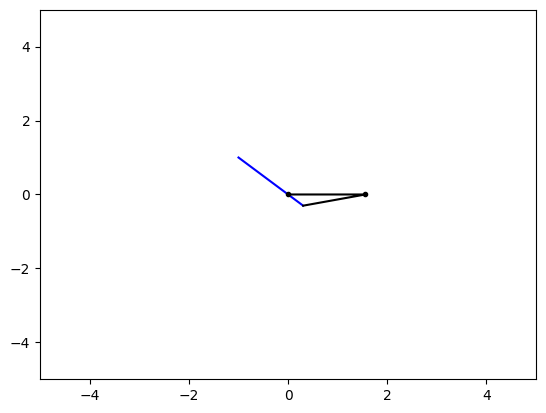

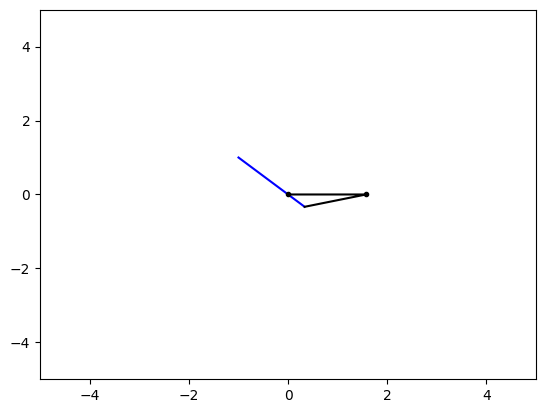

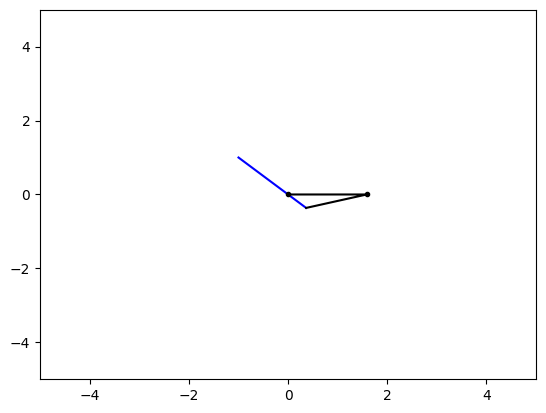

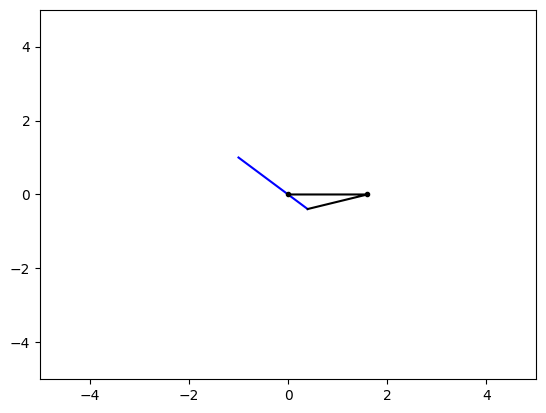

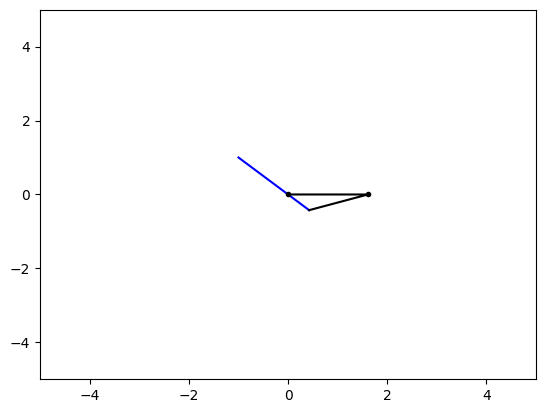

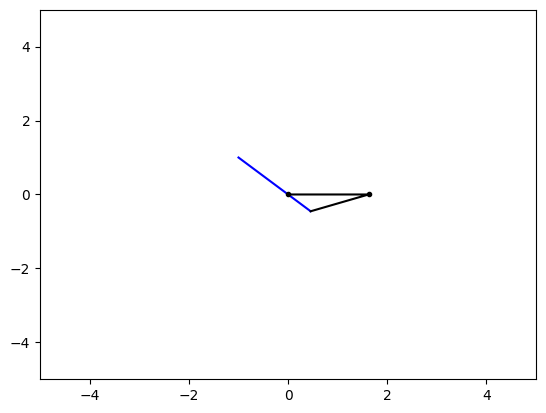

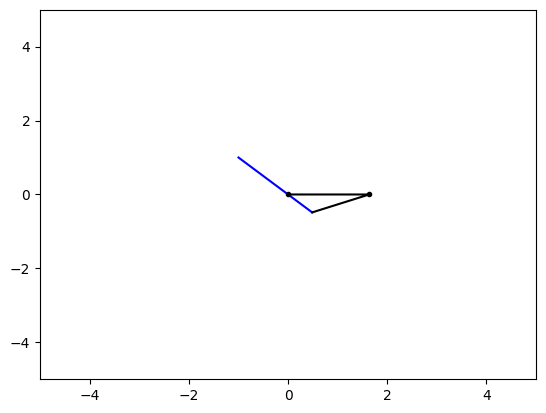

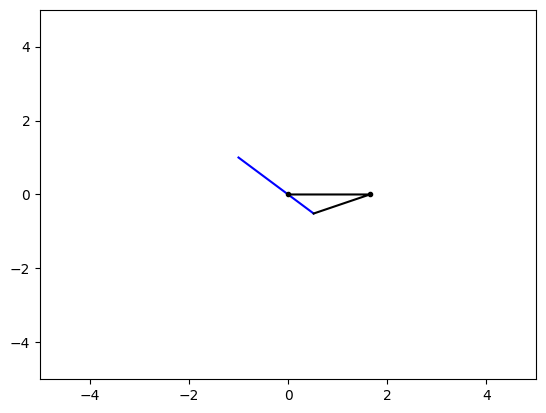

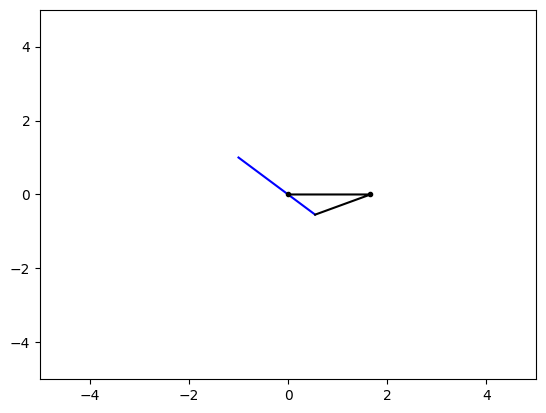

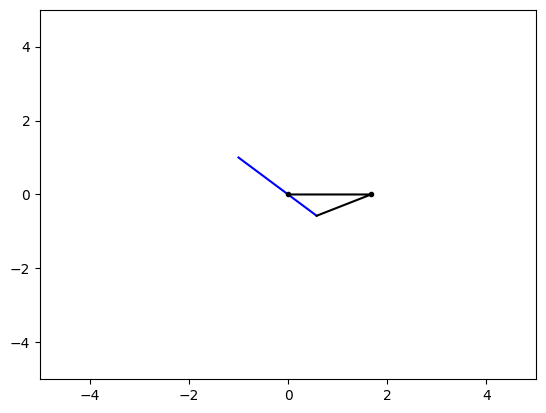

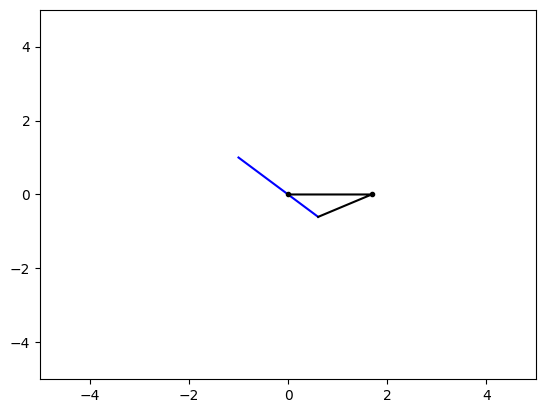

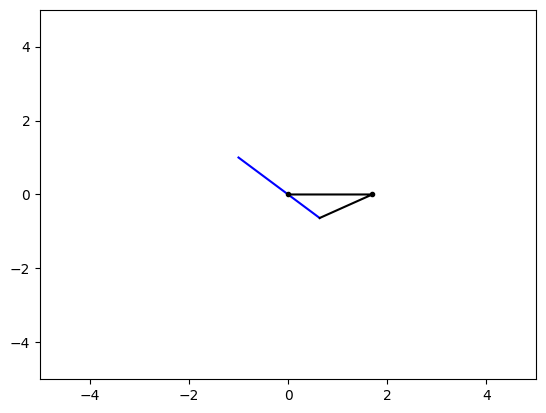

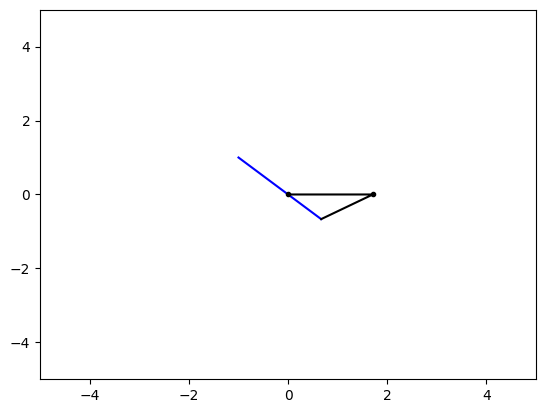

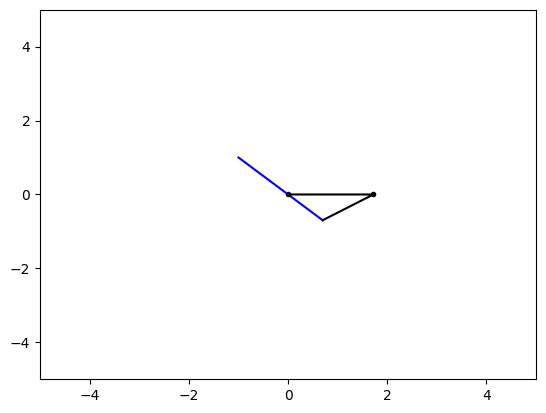

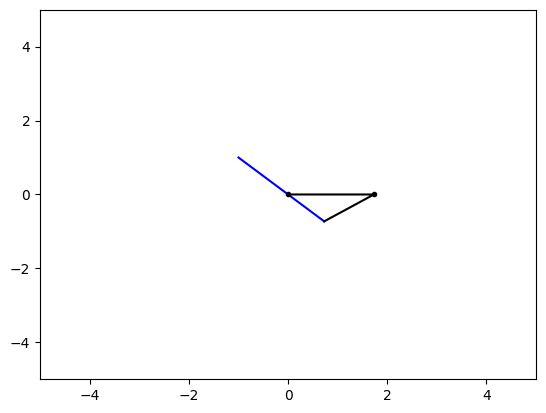

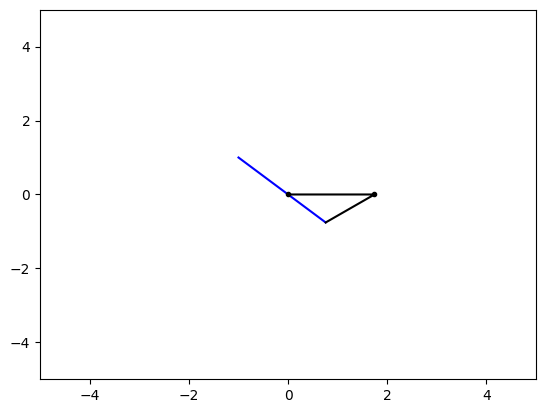

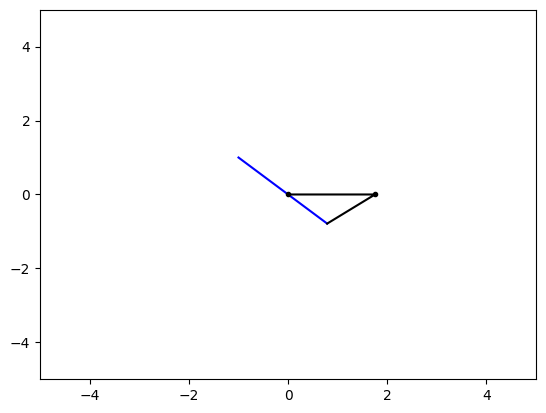

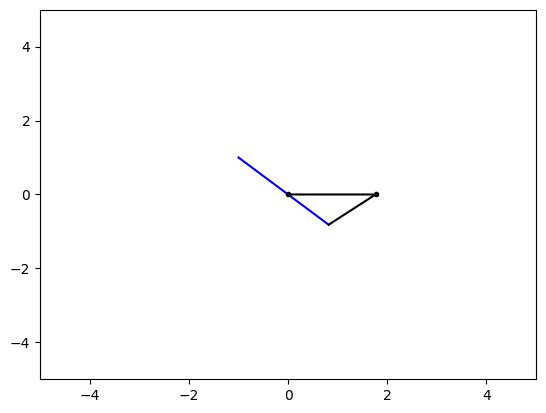

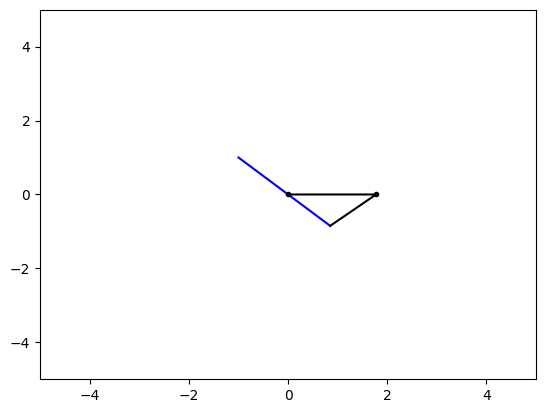

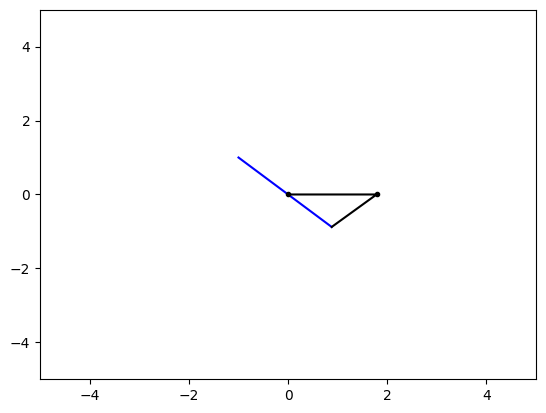

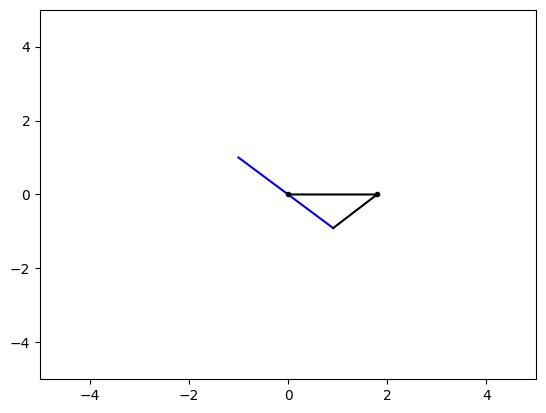

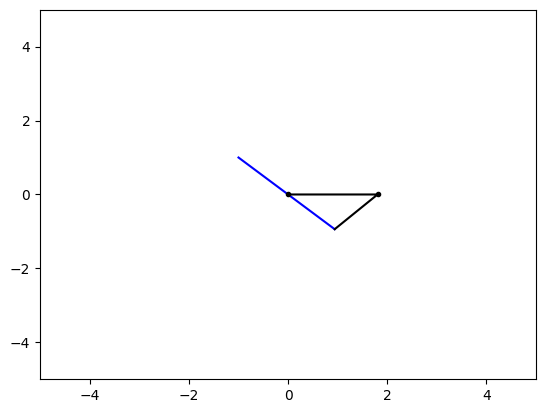

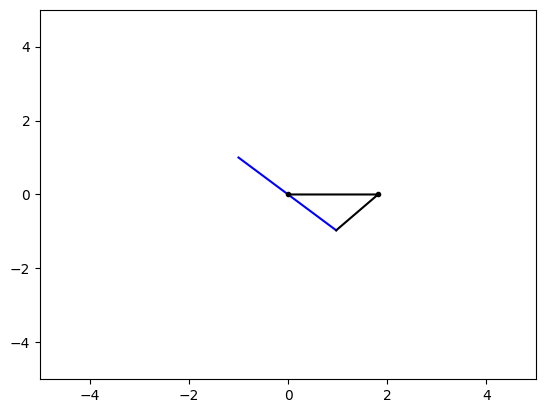

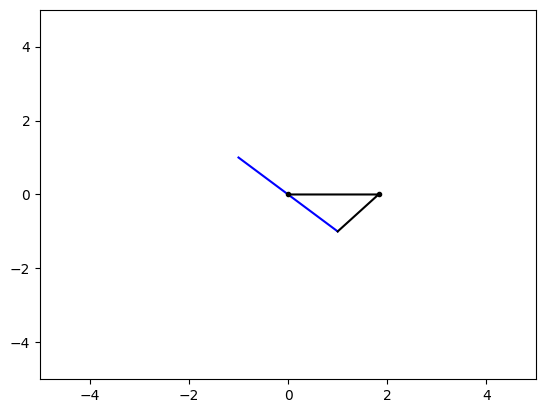

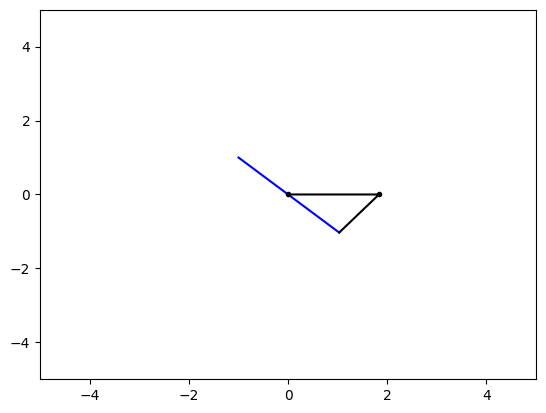

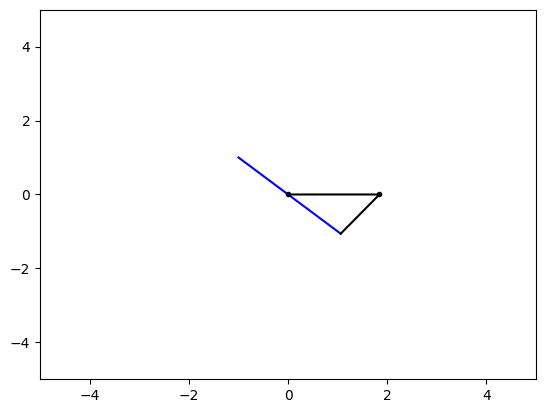

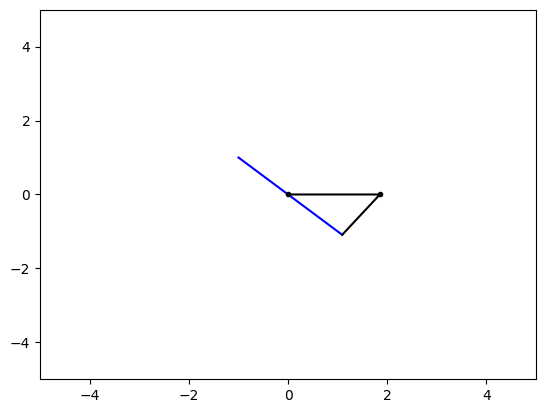

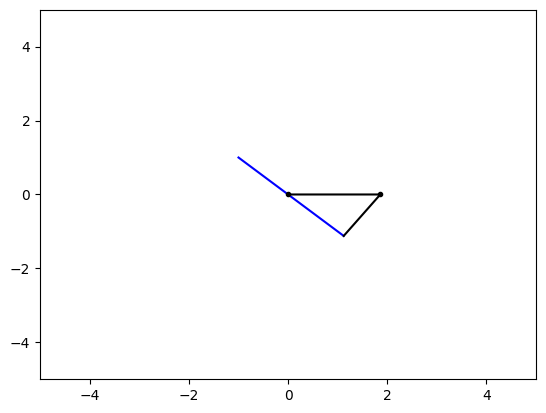

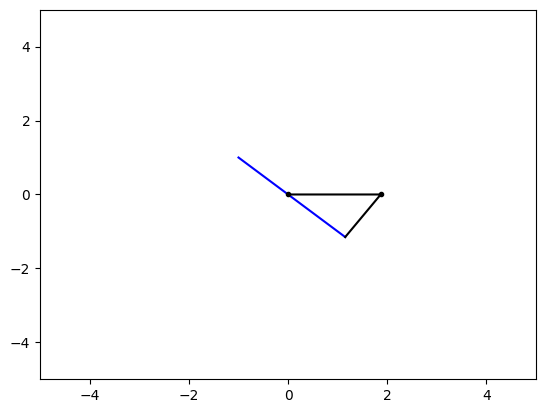

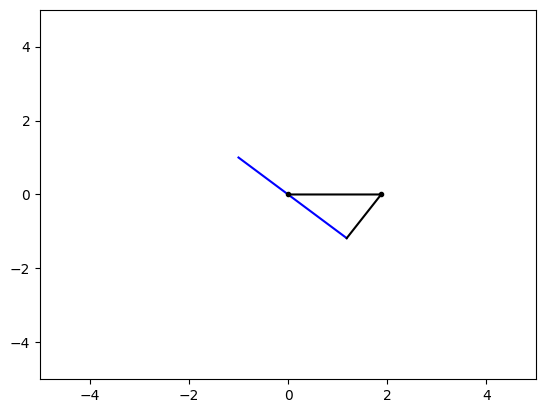

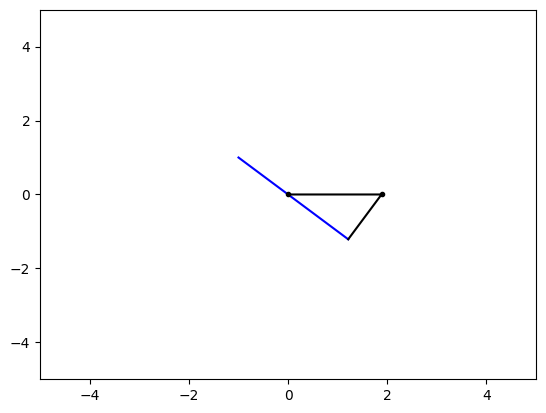

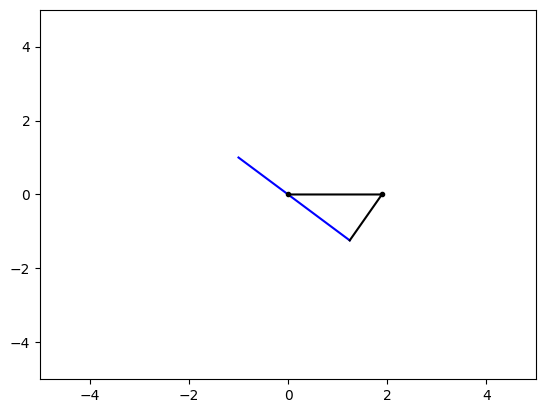

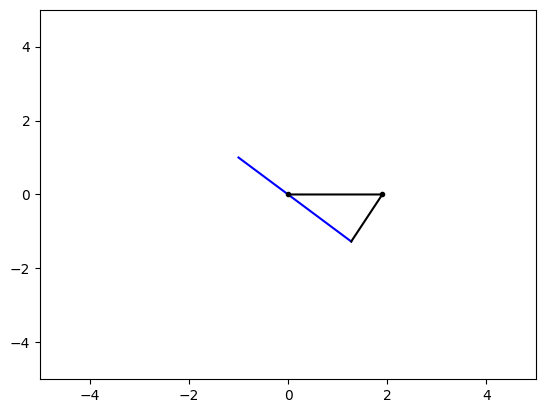

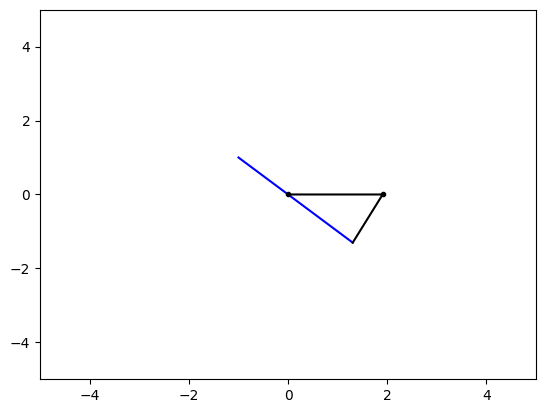

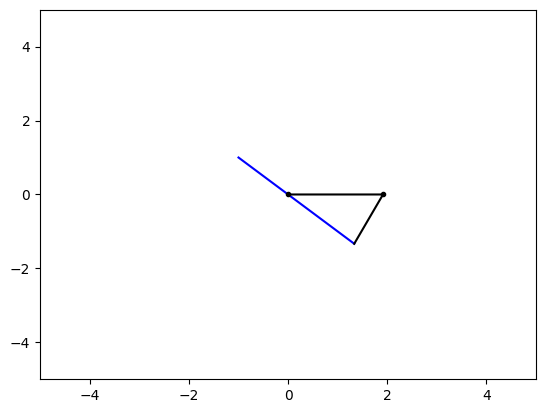

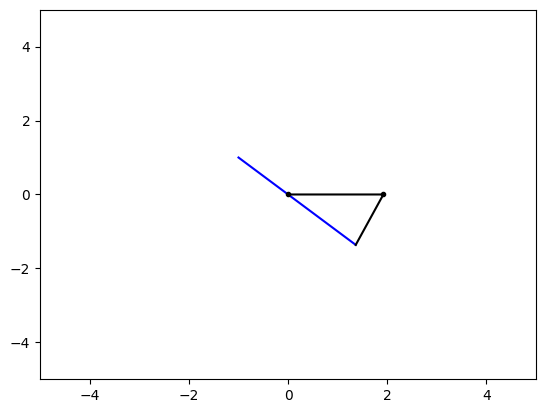

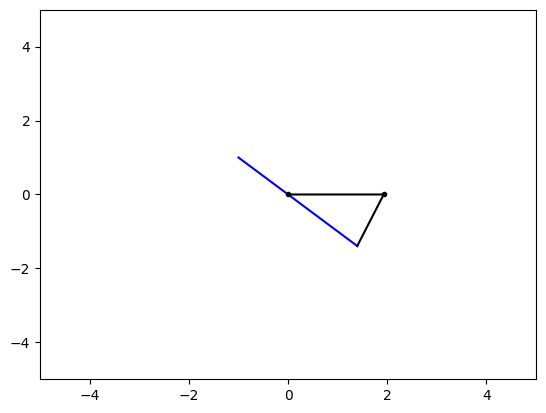

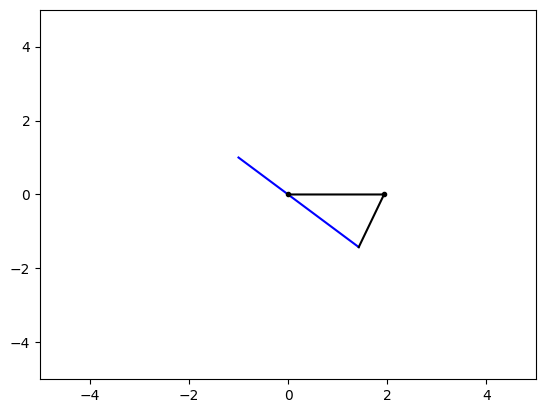

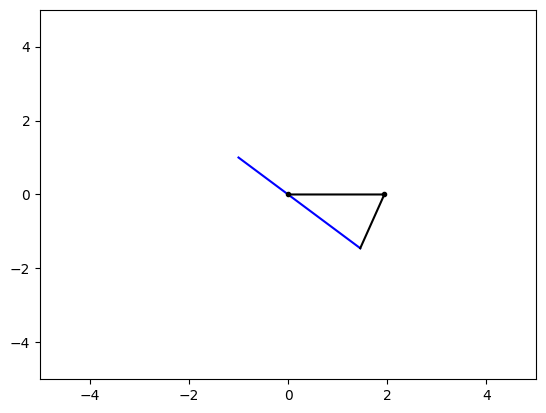

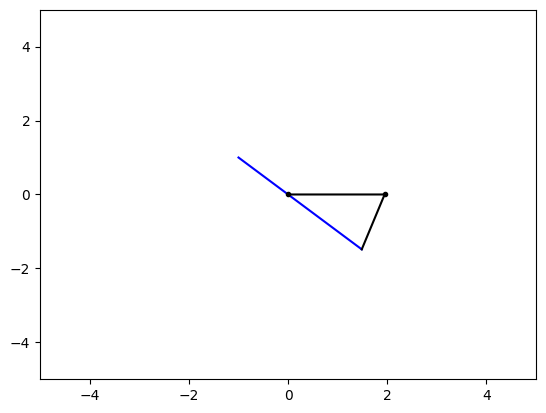

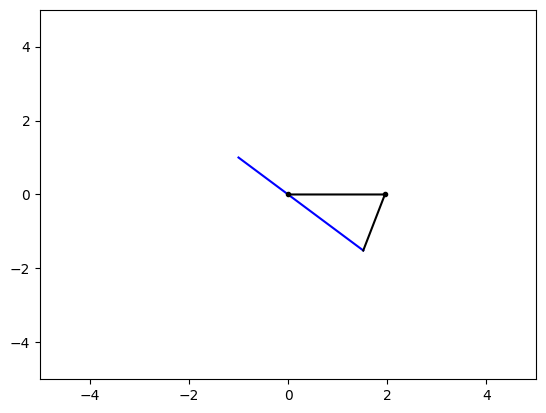

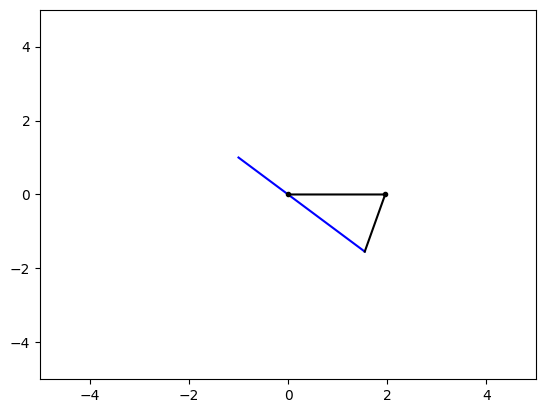

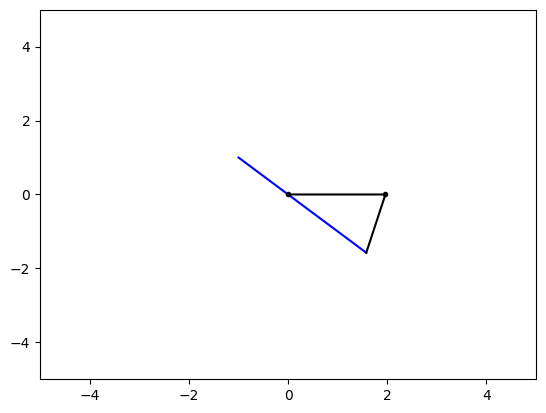

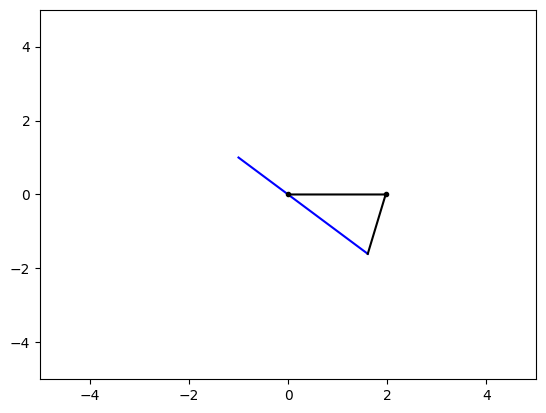

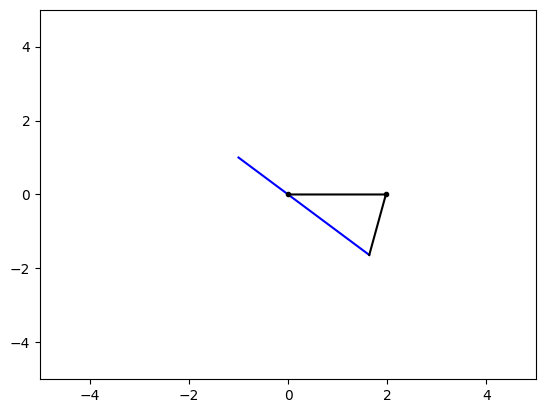

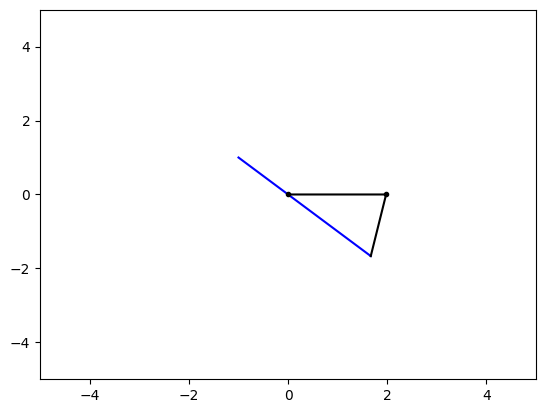

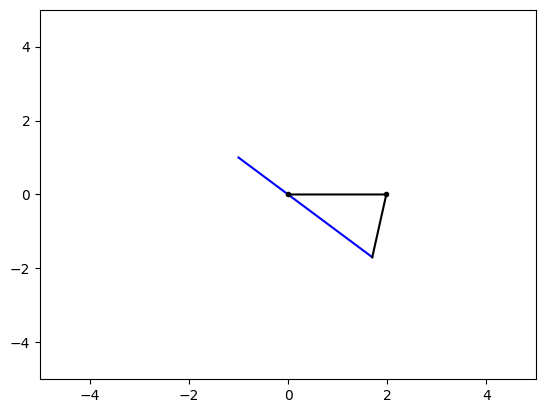

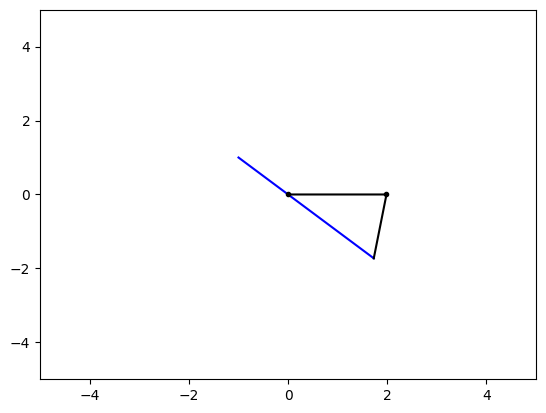

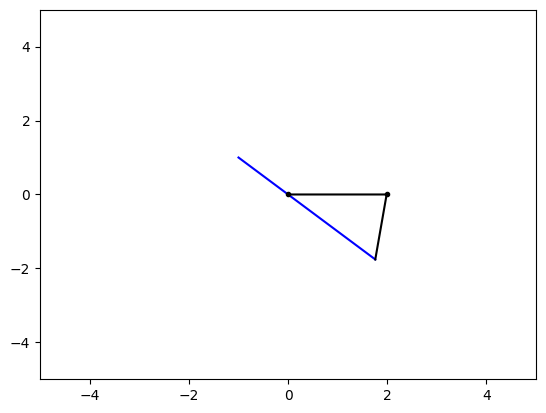

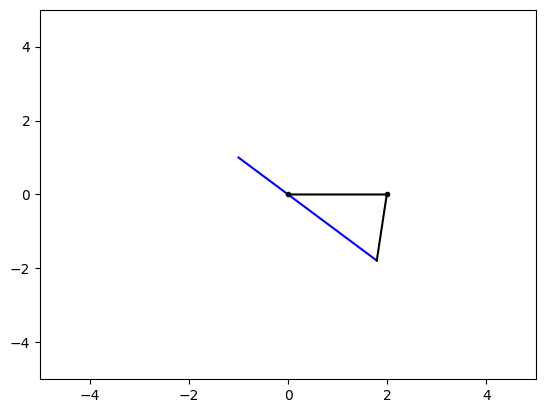

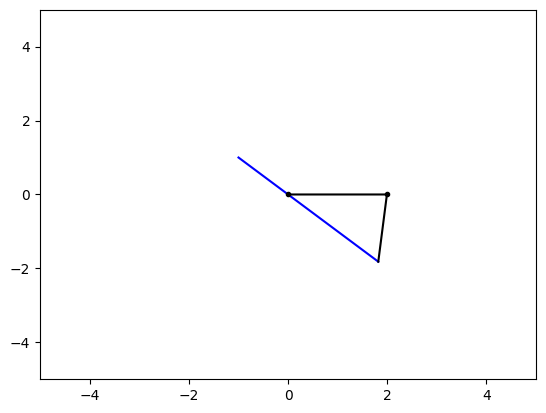

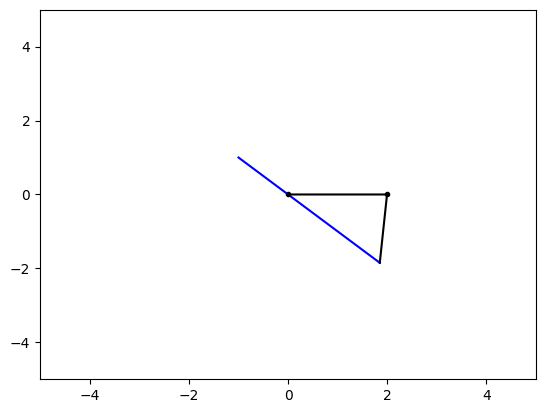

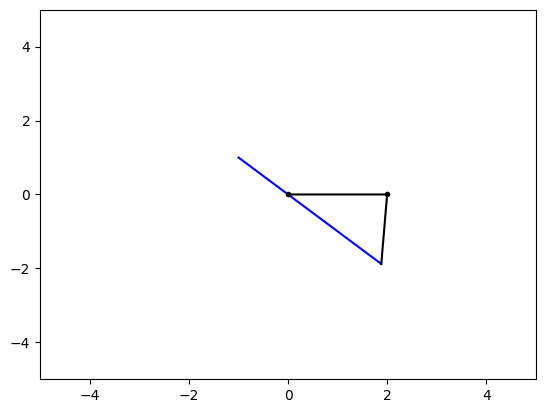

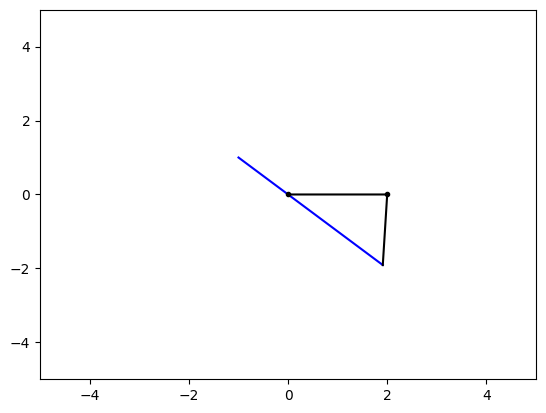

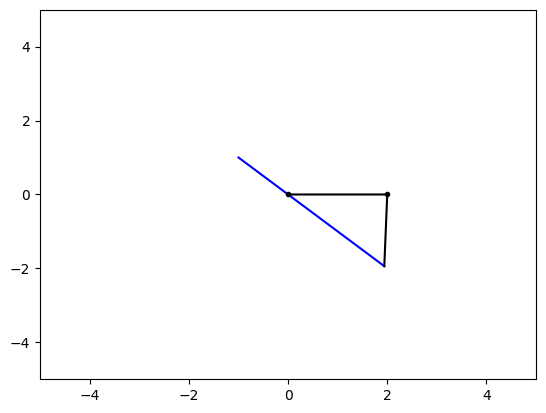

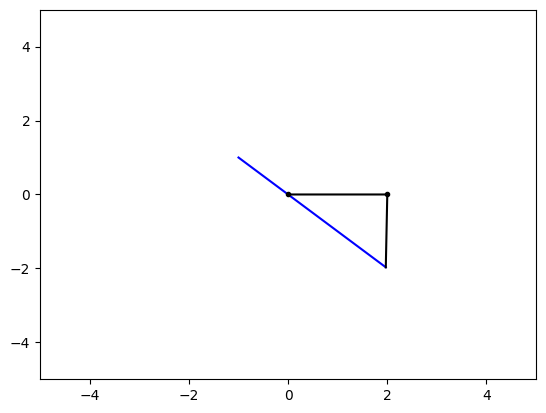

In [24]:
def animacion_trayectoria_pci(xs, ys, l1, l2):
  n = min(len(xs), len(xs))
  for i in range(1, n):
    plt.cla()
    dibujar_trayectoria_pci(xs[0:i], ys[0:i], l1, l2)
    plt.pause(0.001)

animacion_trayectoria_pci(xs, ys, 2, 2)

Para comprobar que las funciones funcionan correctamente se hace una llamada a la función *animacion_trayectoria_pci*. Dado que la función *dibujar_trayectoria_pci* es llamada internamente por esta función si funciona la segunda funciona la primera